In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install missingno

In [3]:
import seaborn as sns
import missingno as msno
from scipy import stats

In [4]:
def reduce_memory_usage(df, verbose=True):
    
    '''
    This function reduces the memory sizes of dataframe by changing the datatypes of the columns.
    Parameters
    df - DataFrame whose size to be reduced
    verbose - Boolean, to mention the verbose required or not.
    '''
    numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
# Load the data
df_userscore=pd.read_csv("userscore.csv")
df_merchants=pd.read_csv("merchants.csv")
df_new_merchant_transactions=pd.read_csv("new_merchant_transactions.csv")
df_historical_transactions=reduce_memory_usage(pd.read_csv("historical_transactions.csv"))

Mem. usage decreased to 2026.75 Mb (34.8% reduction)


In [6]:
print(df_userscore.shape)
print(df_merchants.shape)
print(df_new_merchant_transactions.shape)
print(df_historical_transactions.shape)

(201917, 6)
(334696, 22)
(1963031, 14)
(29112361, 14)


#### userscore data

In [8]:
# Explore the data
df_userscore.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749


In [7]:
df_userscore.tail()

,card_id,first_active_month,feature_1,feature_2,feature_3,score
201912,C_ID_963962de2c,Sep-17,3,2,1,-2.740821
201913,C_ID_1314773c0b,Oct-15,3,1,1,0.312917
201914,C_ID_7666735b3d,Aug-17,4,3,0,0.093494
201915,C_ID_73f5a0efd0,Jul-16,3,2,1,-4.676589
201916,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413


In [8]:
df_userscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [9]:
df_userscore.describe(include='all')

,card_id,first_active_month,feature_1,feature_2,feature_3,score
count,201917,201917,201917.000000,201917.000000,201917.000000,201917.000000
unique,201917,75,NaN,NaN,NaN,NaN
top,C_ID_6703c86da6,Sep-17,NaN,NaN,NaN,NaN
freq,1,13878,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.105311,1.745410,0.565569,-0.393636
std,NaN,NaN,1.186160,0.751362,0.495683,3.850500
min,NaN,NaN,1.000000,1.000000,0.000000,-33.219281
25%,NaN,NaN,2.000000,1.000000,0.000000,-0.883110
50%,NaN,NaN,3.000000,2.000000,1.000000,-0.023437
75%,NaN,NaN,4.000000,2.000000,1.000000,0.765453


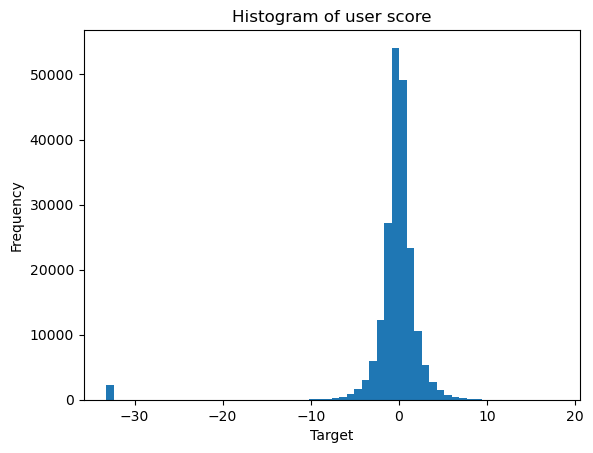

In [11]:
plt.hist(df_userscore["score"], bins=60)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of user score')
plt.show()


<Axes: xlabel='score'>

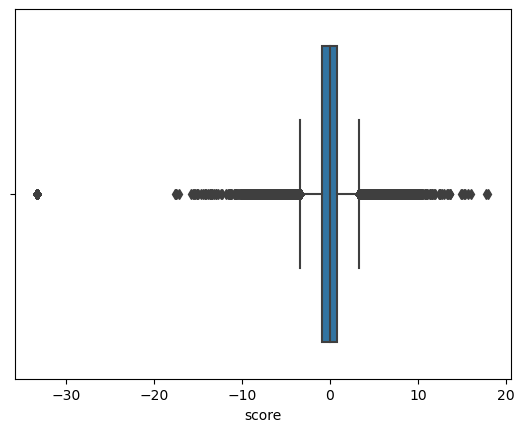

In [12]:
sns.boxplot(df_userscore,x="score")

The min & max values of the score ranges between (-10,10) i guess & there is few values that is less than -30

In [13]:
df_userscore.isna().sum()

card_id               0
first_active_month    0
feature_1             0
feature_2             0
feature_3             0
score                 0
dtype: int64

There is no nulls in userscore data

In [14]:
df_userscore.duplicated().sum()

0

In [7]:
df_userscore.drop(df_userscore[(df_userscore.score <-10) | (df_userscore.score >10)].index,inplace=True)

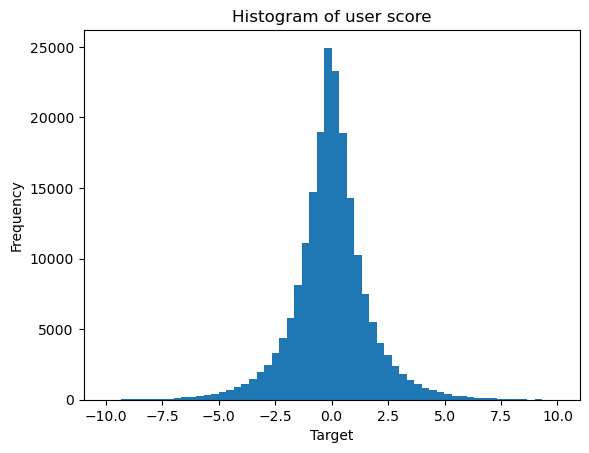

In [16]:
plt.hist(df_userscore["score"], bins=60)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of user score')
plt.show()


Now the score is normally distributed

### Merchat data

In [17]:
df_merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [18]:
df_merchants.tail()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
334691,M_ID_1f4773aa76,1145,705,33,3.174788,-0.047556,N,A,A,1.00,...,0.99,1.019505,6,1.00,1.024796,12,Y,69,9,1.0
334692,M_ID_725a60d404,35,544,29,-0.057471,-0.057471,Y,A,A,0.89,...,0.78,0.813473,6,0.59,0.606765,12,Y,-1,-1,NaN
334693,M_ID_f2045dd267,35,561,7,-0.057471,-0.057471,N,A,A,0.96,...,0.90,0.924769,6,0.74,0.750763,8,Y,160,21,5.0
334694,M_ID_9139332ccc,35,511,7,-0.057471,-0.057471,Y,A,A,0.94,...,0.82,0.783000,6,0.65,0.584000,12,Y,-1,-1,NaN
334695,M_ID_cd2c0b07e9,35,606,17,-0.057471,-0.057471,N,A,A,0.90,...,0.73,0.744417,6,0.53,0.540334,10,Y,69,9,1.0


In [19]:
df_merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334683 non-null  float64
 13 

In [20]:
df_merchants.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


In [21]:
df_merchants.duplicated().sum()

0

### new_merchant_transactions data

In [22]:
df_new_merchant_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [23]:
df_new_merchant_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,-5.509690e-01,2.197841e+00,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,6.940043e-01,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.468928e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.166294e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748406e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.816162e-01,3.000000e+00,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.631575e+02,5.000000e+00,2.400000e+01,4.100000e+01


In [24]:
df_new_merchant_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


In [25]:
df_new_merchant_transactions.duplicated().sum()

0

### historical_transactions data

In [26]:
df_historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [27]:
df_historical_transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


In [28]:
df_historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [29]:
df_merchants.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

<Axes: >

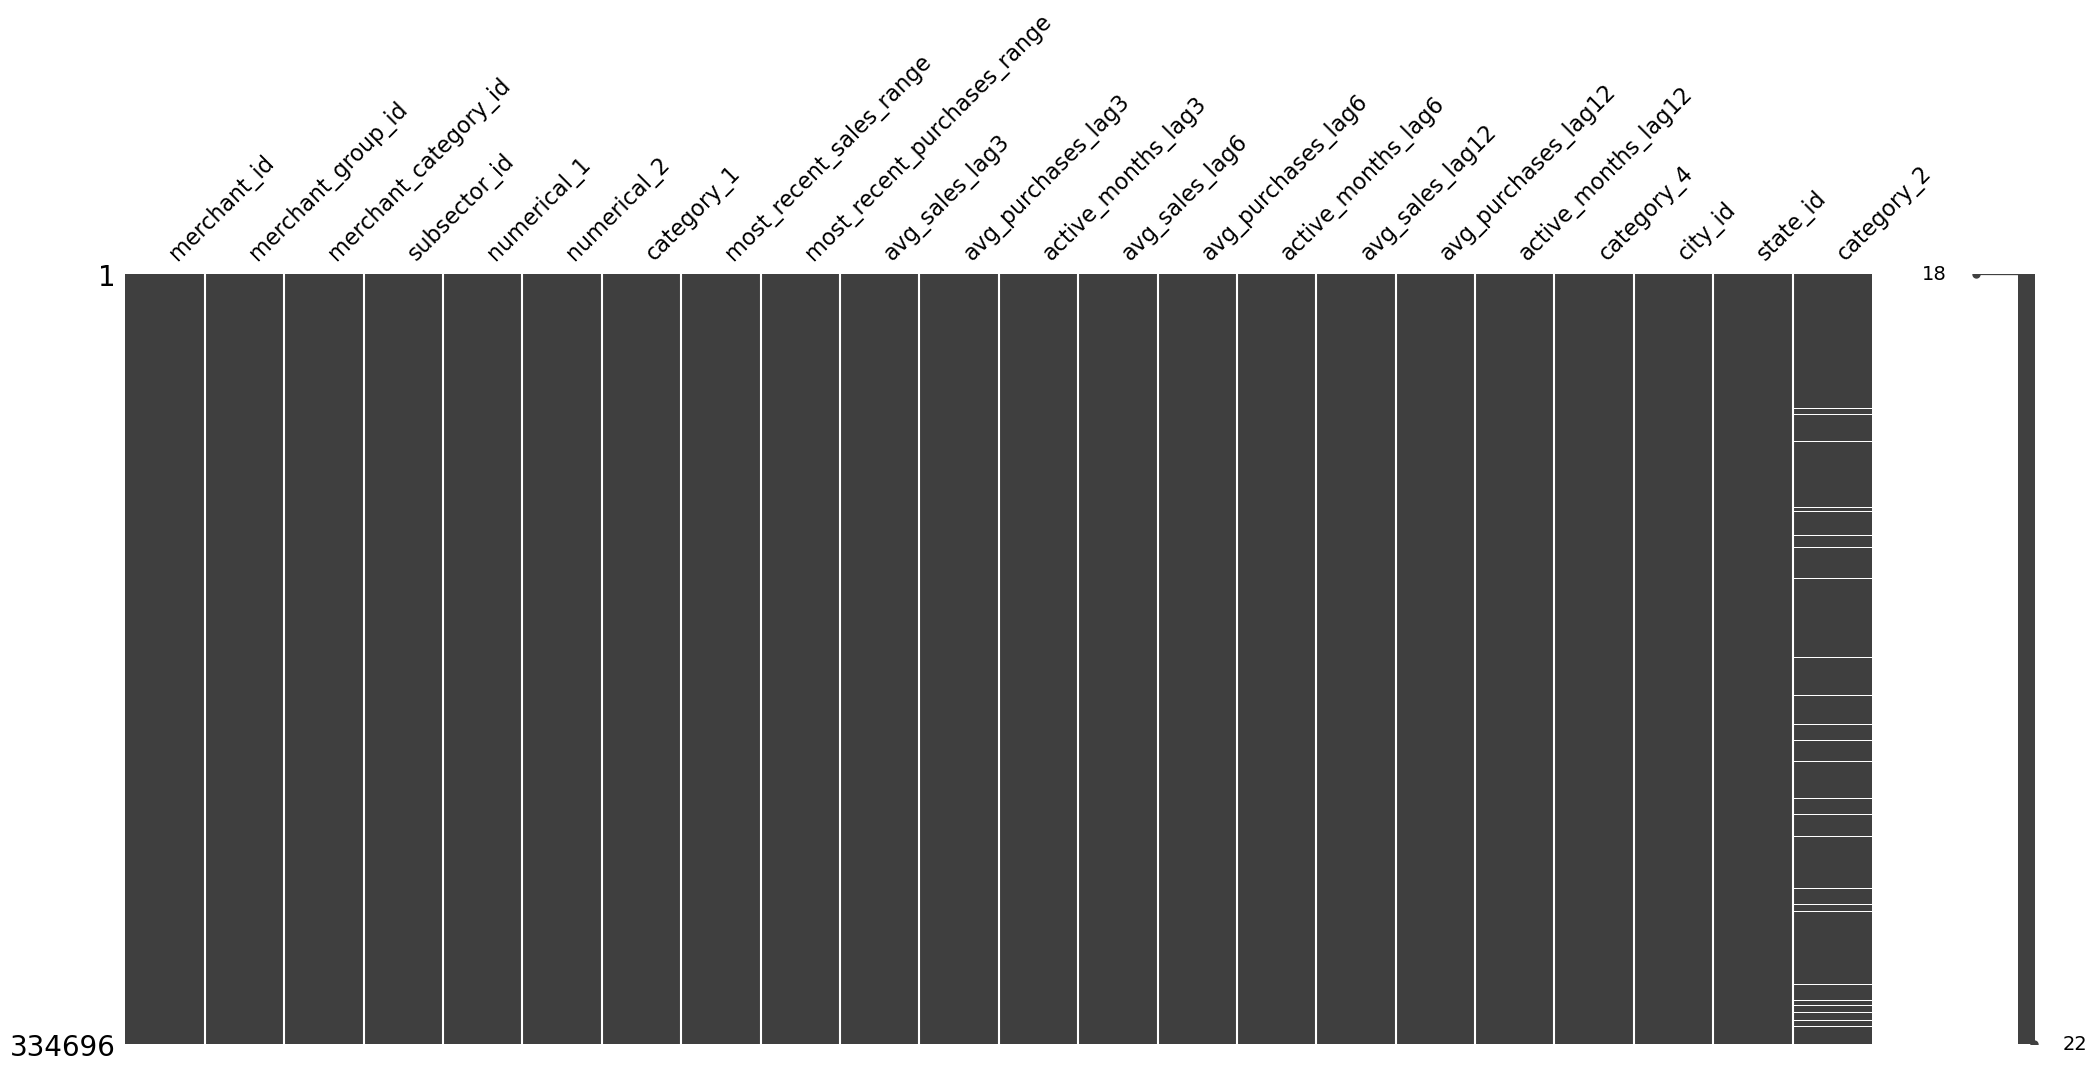

In [30]:
msno.matrix(df_merchants)

<Axes: >

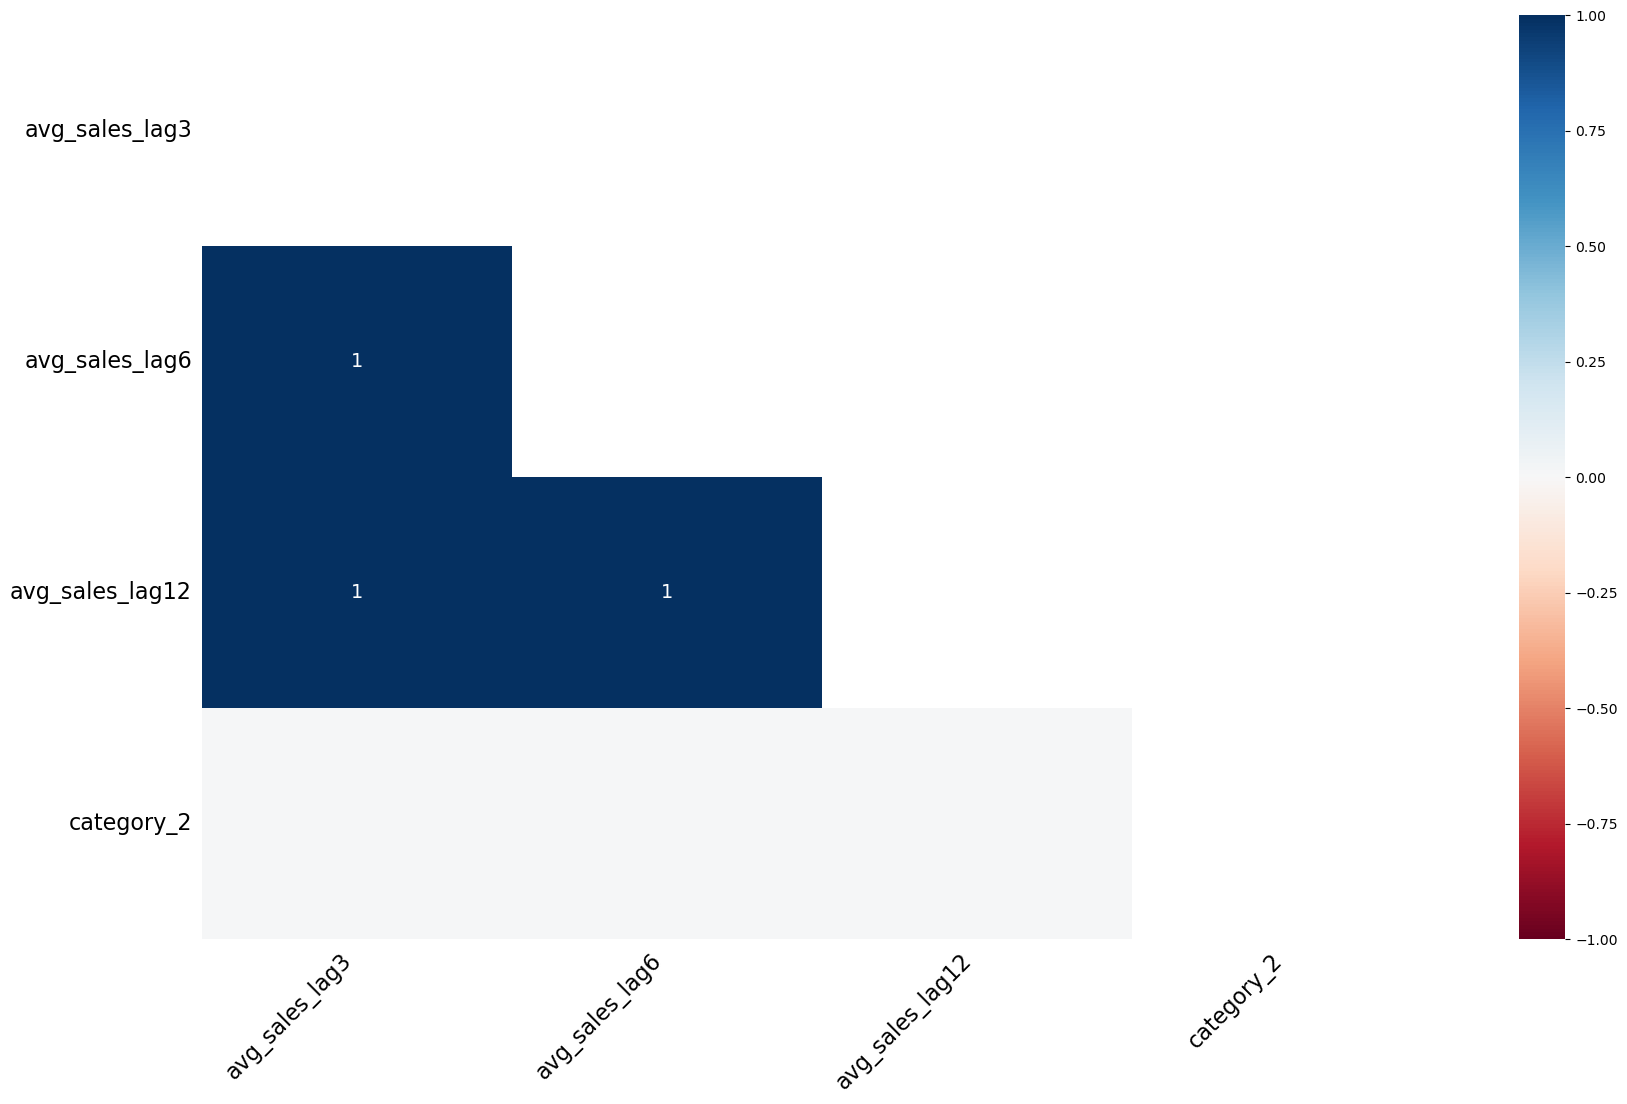

In [31]:
msno.heatmap(df_merchants)

* the category_2 column has the highest number of missing values and it represent 3.5% of the data so we can drop them based on the fact that states if the null rows is 5% or less we can drop them.

In [32]:
df_merchants.shape

(334696, 22)

In [7]:
df_merchants.dropna(inplace=True)

In [11]:
df_merchants.shape

(322802, 22)

In [12]:
df_new_merchant_transactions.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

<Axes: >

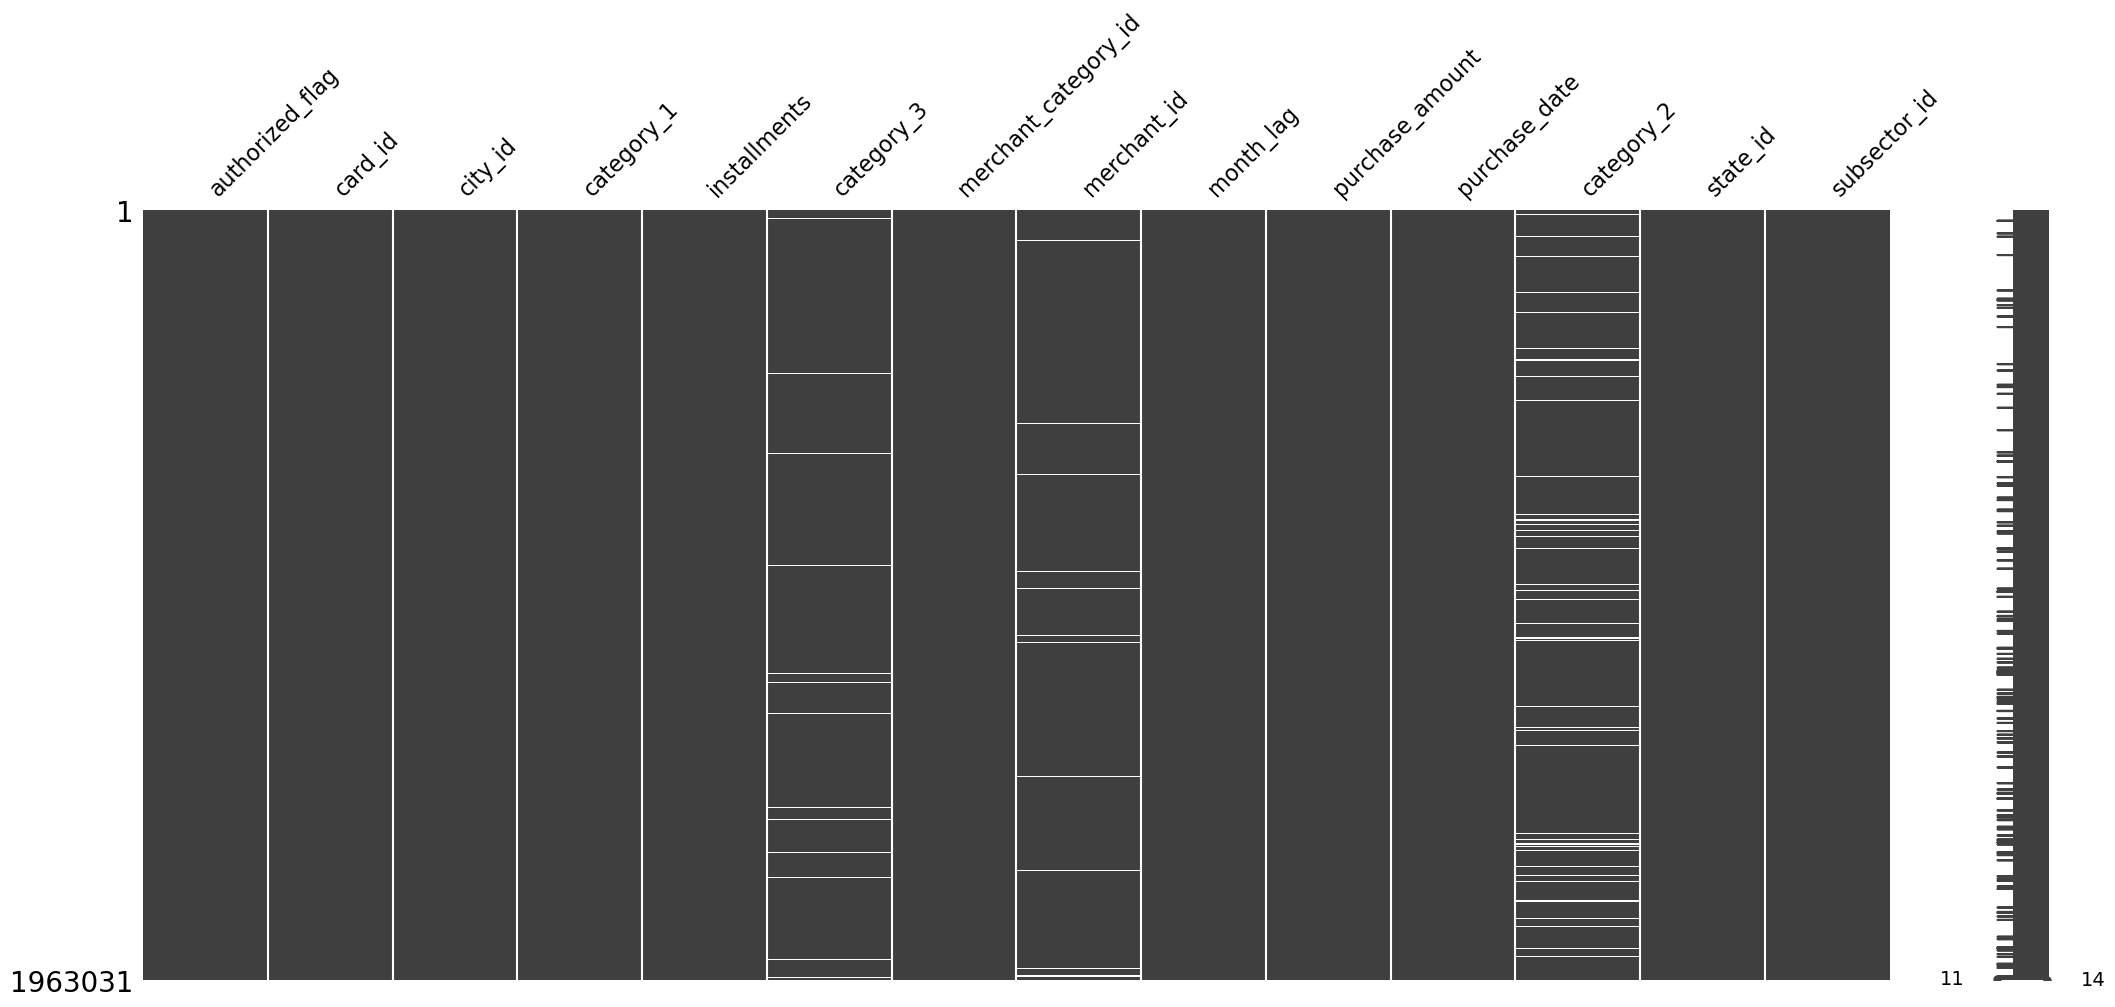

In [36]:
msno.matrix(df_new_merchant_transactions)

<Axes: >

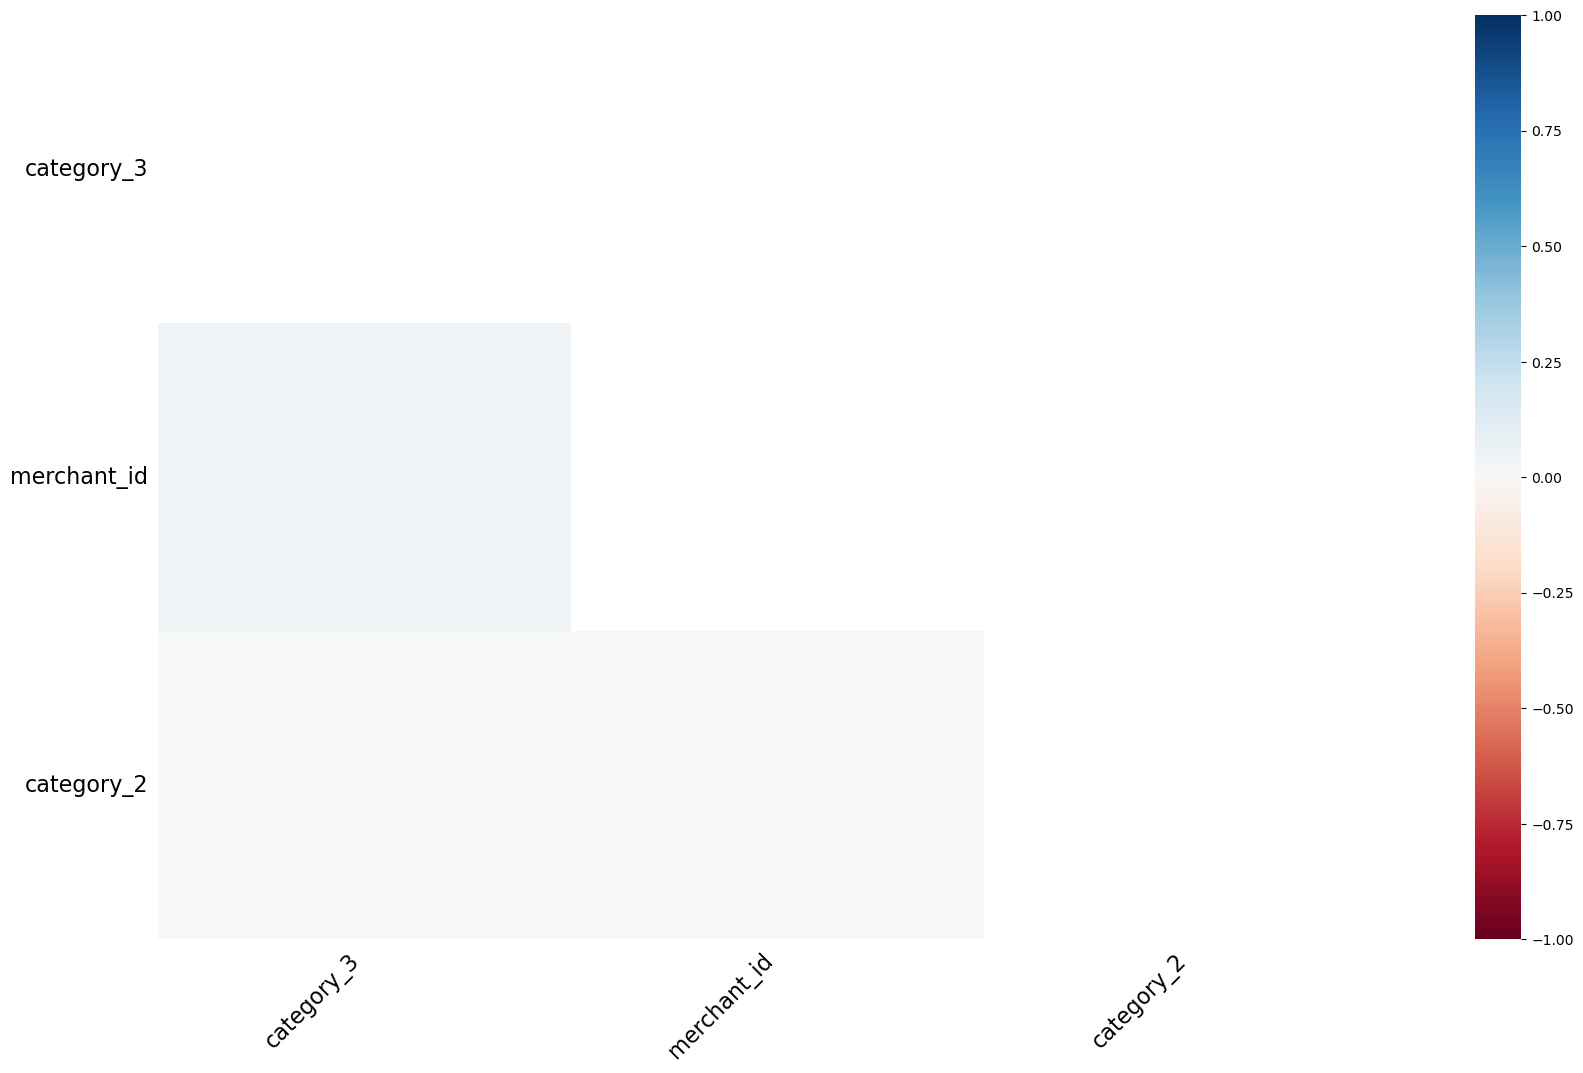

In [37]:
msno.heatmap(df_new_merchant_transactions)

* the category_2 column has the highest number of missing values and it represent 5% of the data so we can drop them.

In [8]:
df_new_merchant_transactions.dropna(inplace=True)

In [14]:
df_new_merchant_transactions.shape

(1776146, 14)

In [15]:
df_historical_transactions.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

<Axes: >

/opt/conda/lib/python3.9/site-packages/matplotlib/image.py:180: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


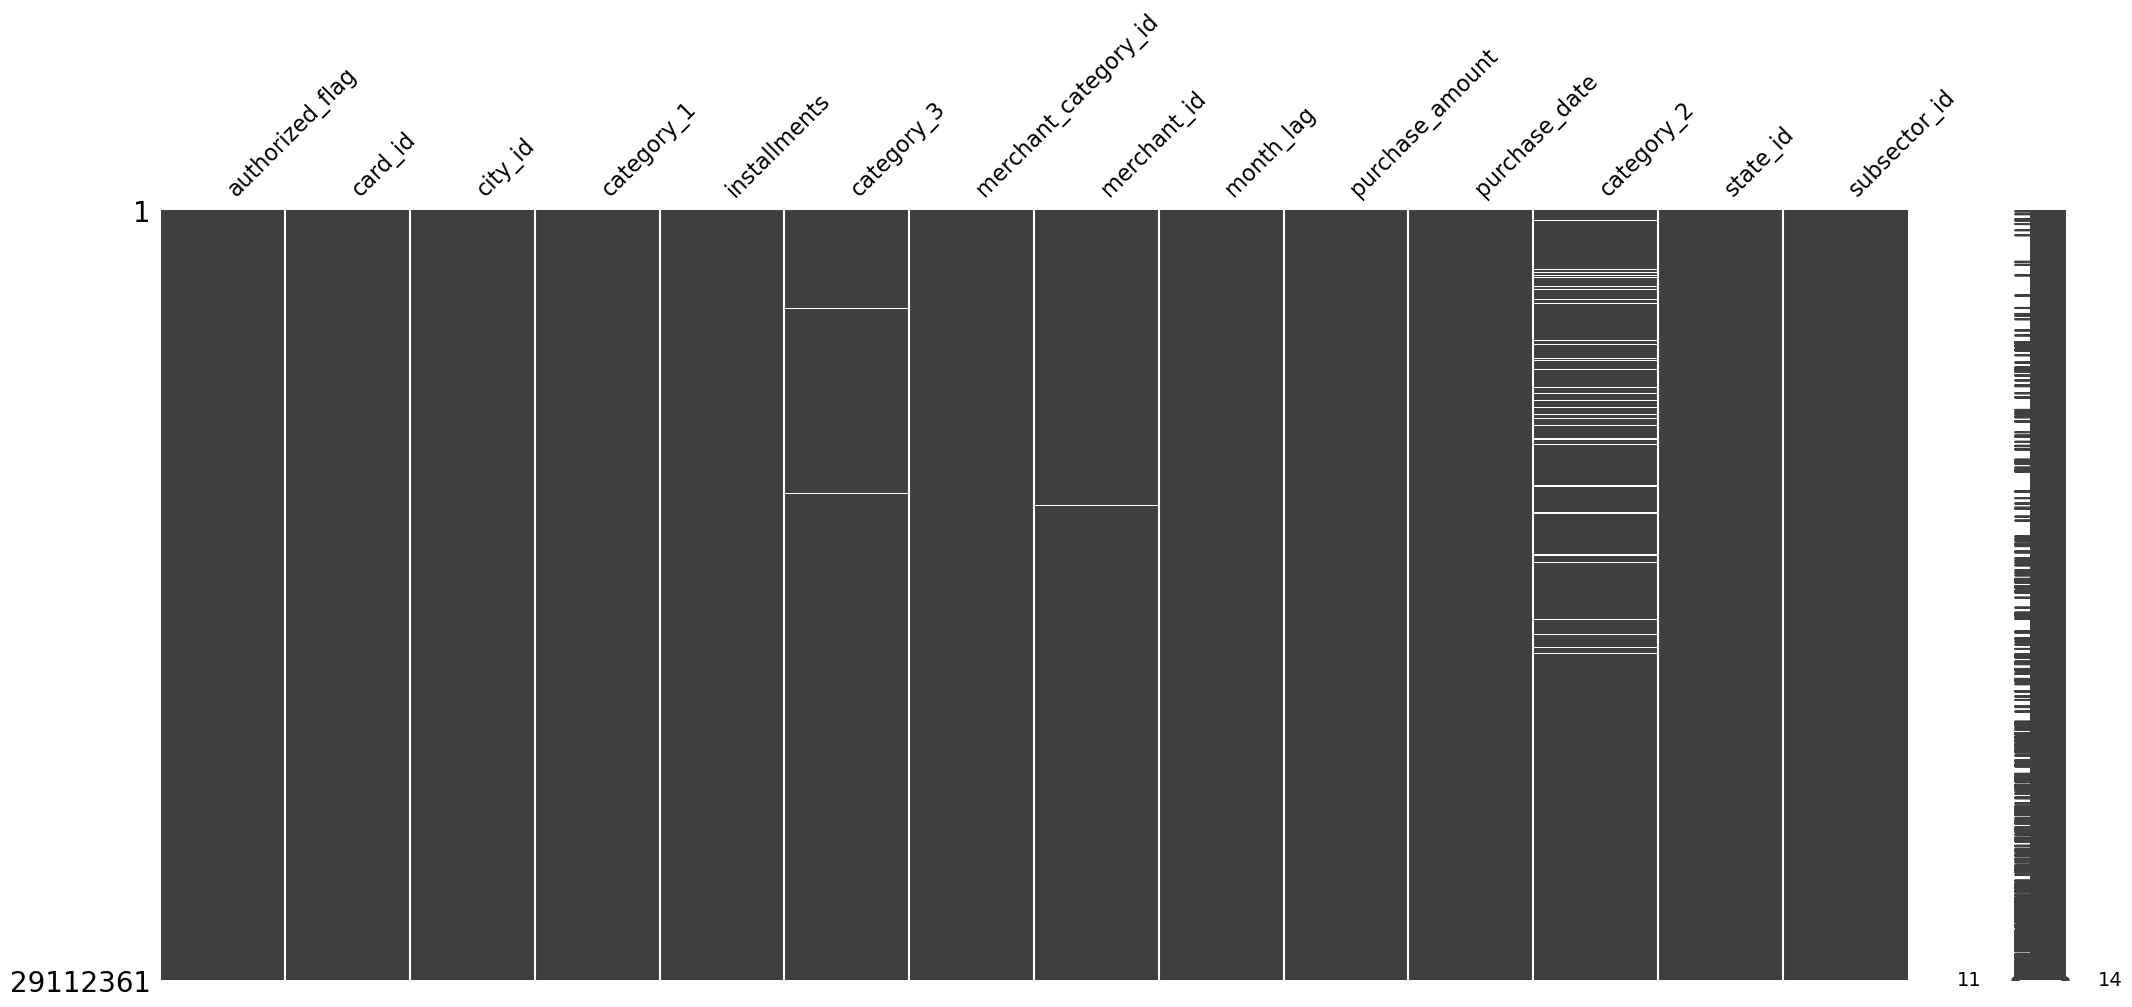

In [39]:
msno.matrix(df_historical_transactions)

<Axes: >

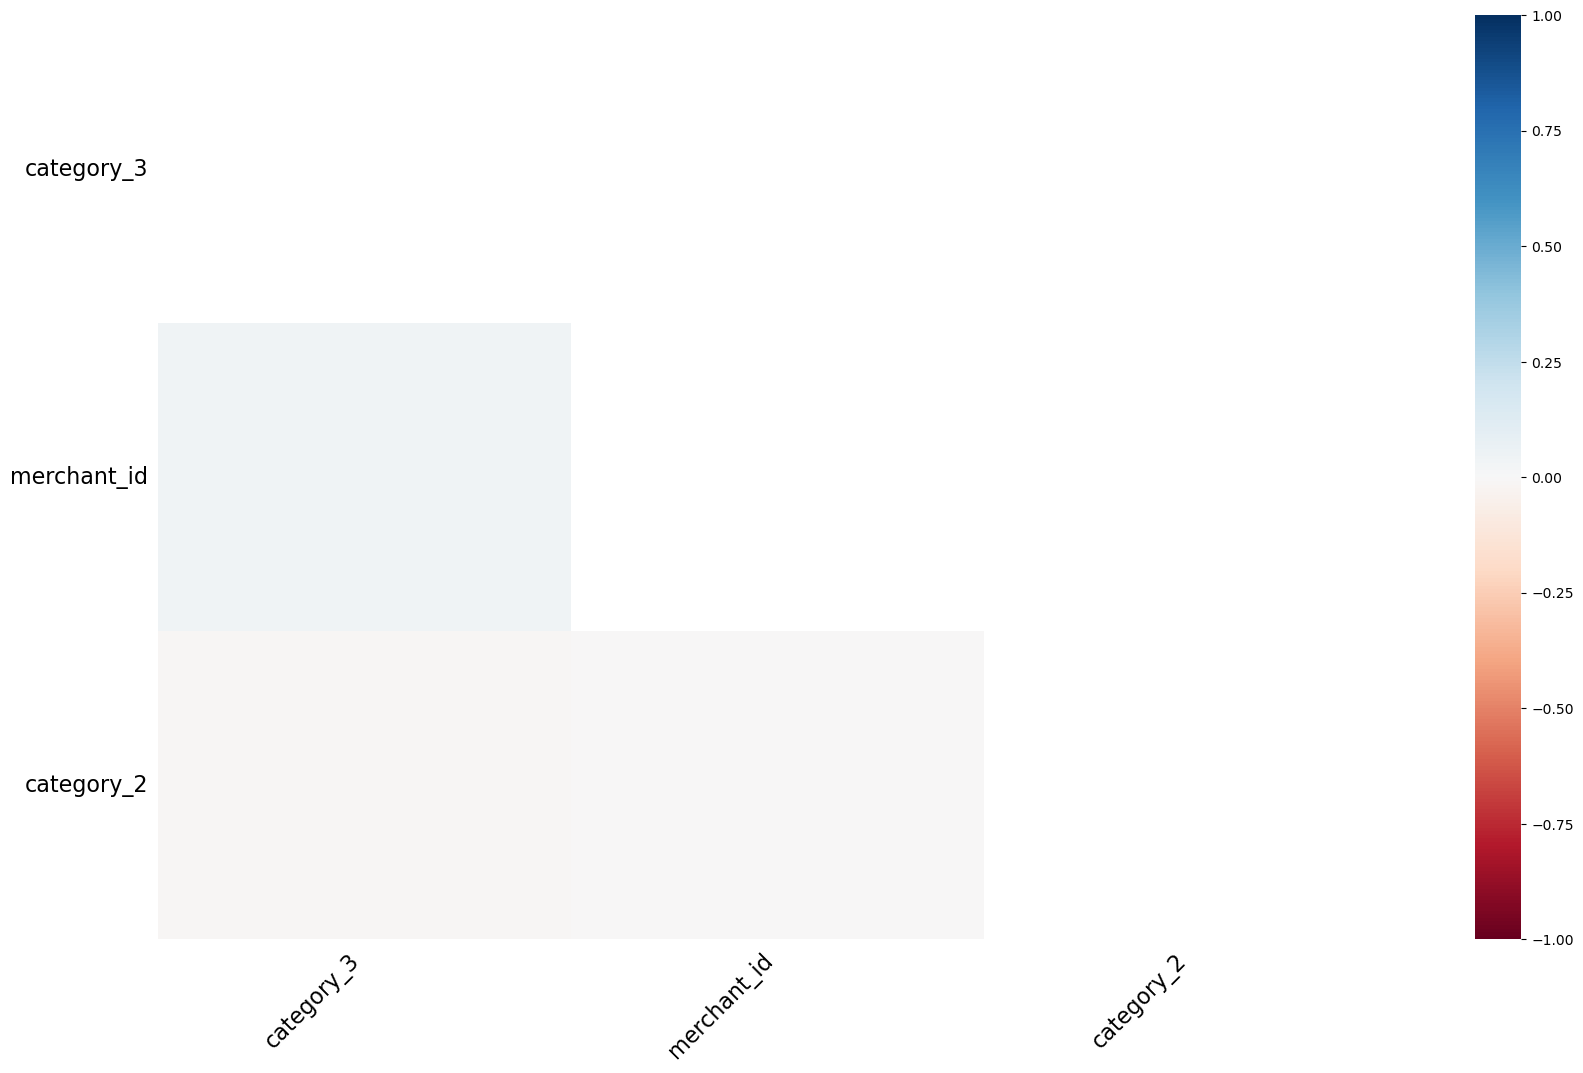

In [45]:
msno.heatmap(df_historical_transactions)

* the category_2 column has the highest number of missing values and it only represent 9% of the data so I will fill it with the mode.
* the category_3 and merchant_id has less than 5% of data so we can drop them.

In [9]:
df_historical_transactions['category_2'] = df_historical_transactions['category_2'].fillna(df_historical_transactions['category_2'].mode()[0])

In [10]:
df_historical_transactions.dropna(subset=['category_3','merchant_id'],inplace=True)

In [18]:
df_historical_transactions.shape

(28802928, 14)

In [11]:
df_transactions = pd.concat([df_historical_transactions, df_new_merchant_transactions], ignore_index=True)

In [12]:
df_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [13]:
# I will merge the transactions dataframe with the merchants datframe based on the common columns between them except for (state_id,city_id)
# so that each transaction record contains also the merchant data that this transaction was done with

common_cols = list(df_transactions.columns.intersection(df_merchants.columns))
common_cols

['city_id',
 'category_1',
 'merchant_category_id',
 'merchant_id',
 'category_2',
 'state_id',
 'subsector_id']

In [14]:
df_transactions=reduce_memory_usage(df_transactions)

Mem. usage decreased to 2128.86 Mb (34.8% reduction)


In [15]:
df_merchant_transactions = pd.merge(df_transactions, df_merchants, on=['merchant_id','category_2','category_1','merchant_category_id','subsector_id'] , how ='inner')

In [16]:
df_merchant_transactions=reduce_memory_usage(df_merchant_transactions)

Mem. usage decreased to 3915.40 Mb (17.5% reduction)


In [17]:
df_merchant_transactions.shape

(22936285, 31)

In [23]:
df_merchant_transactions.isna().sum()

authorized_flag                0
card_id                        0
city_id_x                      0
category_1                     0
installments                   0
category_3                     0
merchant_category_id           0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
category_2                     0
state_id_x                     0
subsector_id                   0
merchant_group_id              0
numerical_1                    0
numerical_2                    0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
city_id_y                      0
state_id_y

In [24]:
df_merchant_transactions.head()

,authorized_flag,card_id,city_id_x,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,...,3,1.14,1.114135,6,1.19,1.156844,12,Y,88,16
1,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,...,3,1.14,1.114135,6,1.19,1.156844,12,Y,88,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.741649,...,3,1.14,1.114135,6,1.19,1.156844,12,Y,88,16
3,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.745405,...,3,1.14,1.114135,6,1.19,1.156844,12,Y,88,16
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.737892,...,3,1.14,1.114135,6,1.19,1.156844,12,Y,88,16


In [25]:
df_merchant_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22936285 entries, 0 to 22936284
Data columns (total 31 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   card_id                      object 
 2   city_id_x                    int64  
 3   category_1                   object 
 4   installments                 int64  
 5   category_3                   object 
 6   merchant_category_id         int64  
 7   merchant_id                  object 
 8   month_lag                    int64  
 9   purchase_amount              float64
 10  purchase_date                object 
 11  category_2                   float64
 12  state_id_x                   int64  
 13  subsector_id                 int64  
 14  merchant_group_id            int64  
 15  numerical_1                  float64
 16  numerical_2                  float64
 17  most_recent_sales_range      object 
 18  most_recent_purchases_range  object 
 19

In [18]:
df_merchant_transactions.drop(['city_id_y','state_id_y'],axis=1,inplace=True)

In [19]:
df_merchant_transactions['state_id']= df_merchant_transactions['state_id_x']

In [20]:
df_merchant_transactions['city_id']= df_merchant_transactions['city_id_x']

In [24]:
# Calculate rate of flags per customer card
df_merchant_transactions['authorized_flag_0_1'] = np.where(df_merchant_transactions['authorized_flag'] =="Y", 1, 0)
authorized_flag_rate = round(df_merchant_transactions.groupby('card_id')['authorized_flag_0_1'].mean(), 2)

# Calculate most frequent city per customer
city =df_merchant_transactions.groupby('card_id')['city_id'].agg(lambda x: x.mode()[0])

# Calculate rate of category_1 per customer card
df_merchant_transactions['category_1_0_1'] = np.where(df_merchant_transactions['category_1'] =="Y", 1, 0)
category_1_rate = df_merchant_transactions.groupby('card_id')['category_1_0_1'].mean()


In [25]:
# Calculate sum of installments per card
installments = df_merchant_transactions.groupby('card_id')['installments'].max()

# Calculate most frequent of category_3 per card
category_3 =df_merchant_transactions.groupby('card_id')['category_3'].agg(lambda x: x.mode()[0])
# Calculate most frequent of merchants the customer used to deal with
merchants = df_merchant_transactions.groupby('card_id')['merchant_id'].agg(lambda x: x.mode()[0])

In [26]:


# Calculate mean for month_lag per customer
month_lag = df_merchant_transactions.groupby('card_id')['month_lag'].mean()

# Calculate mean purchases per customer
purchase_amount = df_merchant_transactions.groupby('card_id')['purchase_amount'].sum()

# Calculate avg_sales_lag3 of most frequent merchants the customer used to deal with
avg_sales_lag3 = df_merchant_transactions.groupby('card_id')['avg_sales_lag3'].agg(lambda x: x.mode()[0])



# Calculate avg_sales_lag6 of most frequent merchants the customer used to deal with
avg_sales_lag6 = df_merchant_transactions.groupby('card_id')['avg_sales_lag6'].agg(lambda x: x.mode()[0])

# Calculate avg_sales_lag12 of most frequent merchants the customer used to deal with
avg_sales_lag12 = df_merchant_transactions.groupby('card_id')['avg_sales_lag12'].agg(lambda x: x.mode()[0])


In [27]:

# Calculate avg_purchases_lag3 of most frequent merchants the customer used to deal with
avg_purchases_lag3 = df_merchant_transactions.groupby('card_id')['avg_purchases_lag3'].agg(lambda x: x.mode()[0])
# Calculate avg_purchases_lag6 of most frequent merchants the customer used to deal with
avg_purchases_lag6 = df_merchant_transactions.groupby('card_id')['avg_purchases_lag6'].agg(lambda x: x.mode()[0])

# Calculate avg_purchases_lag12 of most frequent merchants the customer used to deal with
avg_purchases_lag12 = df_merchant_transactions.groupby('card_id')['avg_purchases_lag12'].agg(lambda x: x.mode()[0])


# Calculate active_months_lag3 of most frequent merchants the customer used to deal with
active_months_lag3 = df_merchant_transactions.groupby('card_id')['active_months_lag3'].agg(lambda x: x.mode()[0])
# Calculate active_months_lag6 of most frequent merchants the customer used to deal with
active_months_lag6 = df_merchant_transactions.groupby('card_id')['active_months_lag6'].agg(lambda x: x.mode()[0])
# Calculate active_months_lag12 of most frequent merchants the customer used to deal with
active_months_lag12 = df_merchant_transactions.groupby('card_id')['active_months_lag12'].agg(lambda x: x.mode()[0])


# Calculate rate of category_4 per customer card
df_merchant_transactions['category_4_0_1'] = np.where(df_merchant_transactions['category_4'] =="Y", 1, 0)
category_4_rate = round(df_merchant_transactions.groupby('card_id')['category_4_0_1'].mean(), 2)


In [28]:
# Concatenate new features into one DataFrame
features = pd.concat([authorized_flag_rate, category_1_rate, city, installments, category_3, merchants, month_lag, purchase_amount, avg_sales_lag3, avg_sales_lag6, avg_sales_lag12,
                      avg_purchases_lag3, avg_purchases_lag6, avg_purchases_lag12, active_months_lag3, active_months_lag6, active_months_lag12, category_4_rate ], axis=1)
features.columns = ['authorized_flag_rate', 'category_1_rate', 'city', 'installments', 'category_3', 'merchants', 'month_lag', 'purchase_amount', 'avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12',
                      'avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12', 'active_months_lag3', 'active_months_lag6', 'active_months_lag12', 'category_4_rate' ]

In [29]:
features.head()

,authorized_flag_rate,category_1_rate,city,installments,category_3,merchants,month_lag,purchase_amount,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12,active_months_lag3,active_months_lag6,active_months_lag12,category_4_rate
card_id,,,,,,,,,,,,,,,,,,
C_ID_00007093c1,0.74,0,244,6,B,M_ID_9400cf2342,-6.188034,-55.526132,0.88,0.96,1.02,0.880170,0.959246,0.990420,3,6,12,0.15
C_ID_0001238066,0.98,0,314,10,B,M_ID_d17aabd756,-1.404580,-79.934912,0.98,0.99,1.03,0.982012,0.984455,0.990617,3,6,12,0.13
C_ID_0001506ef0,0.93,0,137,1,A,M_ID_b1fc88154d,-4.254545,-27.083304,1.00,1.02,0.95,1.066087,1.087142,1.095145,3,6,12,1.00
C_ID_0001793786,0.94,0,204,1,A,M_ID_7aba38d825,-2.418605,-1.136530,1.00,1.00,1.04,0.992312,0.987446,0.992137,3,6,12,0.30
C_ID_000183fdda,0.95,0,161,10,B,M_ID_f9cfe0a43b,-2.276423,-69.116184,1.05,1.02,0.98,1.056556,1.027423,1.008010,3,6,12,0.95


In [30]:
features.reset_index(inplace=True)
features.head()

,card_id,authorized_flag_rate,category_1_rate,city,installments,category_3,merchants,month_lag,purchase_amount,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12,active_months_lag3,active_months_lag6,active_months_lag12,category_4_rate
0,C_ID_00007093c1,0.74,0,244,6,B,M_ID_9400cf2342,-6.188034,-55.526132,0.88,0.96,1.02,0.880170,0.959246,0.990420,3,6,12,0.15
1,C_ID_0001238066,0.98,0,314,10,B,M_ID_d17aabd756,-1.404580,-79.934912,0.98,0.99,1.03,0.982012,0.984455,0.990617,3,6,12,0.13
2,C_ID_0001506ef0,0.93,0,137,1,A,M_ID_b1fc88154d,-4.254545,-27.083304,1.00,1.02,0.95,1.066087,1.087142,1.095145,3,6,12,1.00
3,C_ID_0001793786,0.94,0,204,1,A,M_ID_7aba38d825,-2.418605,-1.136530,1.00,1.00,1.04,0.992312,0.987446,0.992137,3,6,12,0.30
4,C_ID_000183fdda,0.95,0,161,10,B,M_ID_f9cfe0a43b,-2.276423,-69.116184,1.05,1.02,0.98,1.056556,1.027423,1.008010,3,6,12,0.95


In [31]:
data = df_userscore.merge(features, on=['card_id'], how='inner')

In [32]:
data.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score,authorized_flag_rate,category_1_rate,city,installments,...,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12,active_months_lag3,active_months_lag6,active_months_lag12,category_4_rate
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,0.97,0,69,1,...,0.93,0.90,0.93,0.979454,0.953233,0.981699,3,6,12,0.93
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913,0.98,0,69,10,...,1.07,1.10,1.11,1.065682,1.081449,1.132069,3,6,12,0.91
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056,0.95,0,143,0,...,1.00,1.01,1.02,1.007511,1.033525,1.052752,3,6,12,0.93
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495,1.00,0,17,2,...,1.12,1.14,1.19,1.126547,1.143512,1.189079,3,6,12,0.98
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749,0.98,0,17,1,...,1.11,1.04,1.02,1.103070,1.054094,1.055007,3,6,12,0.90


In [33]:
data.describe(include="all")

,card_id,first_active_month,feature_1,feature_2,feature_3,score,authorized_flag_rate,category_1_rate,city,installments,...,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12,active_months_lag3,active_months_lag6,active_months_lag12,category_4_rate
count,195093,195093,195093.000000,195093.000000,195093.000000,195093.000000,195093.000000,195093.0,195093.000000,195093.000000,...,195093.000000,195093.000000,195093.000000,195093.000000,195093.000000,195093.000000,195093.000000,195093.000000,195093.000000,195093.000000
unique,195093,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C_ID_170db1e326,Sep-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,13424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.107175,1.742692,0.569964,-0.389647,0.919883,0.0,142.777357,3.251362,...,49.143439,48.737229,40.475329,5.013224,5.026881,4.897563,2.999969,5.999749,11.991148,0.399963
std,NaN,NaN,1.182326,0.753604,0.495082,3.808118,0.104242,0.0,101.189328,19.822249,...,6396.235670,6042.257038,5177.757372,485.170775,440.708076,395.459367,0.007159,0.026498,0.180721,0.417318
min,NaN,NaN,1.000000,1.000000,0.000000,-33.219281,0.000000,0.0,-1.000000,0.000000,...,0.340000,0.160000,0.150000,0.333495,0.167045,0.102951,1.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,2.000000,1.000000,0.000000,-0.885150,0.890000,0.0,69.000000,0.000000,...,0.970000,0.960000,0.950000,0.982127,0.972746,0.969136,3.000000,6.000000,12.000000,0.000000
50%,NaN,NaN,3.000000,2.000000,1.000000,-0.031331,0.950000,0.0,135.000000,1.000000,...,1.010000,1.020000,1.030000,1.017038,1.025836,1.036631,3.000000,6.000000,12.000000,0.170000
75%,NaN,NaN,4.000000,2.000000,1.000000,0.761196,1.000000,0.0,216.000000,5.000000,...,1.060000,1.080000,1.110000,1.071513,1.097394,1.124494,3.000000,6.000000,12.000000,0.900000


In [34]:
data.columns

Index(['card_id', 'first_active_month', 'feature_1', 'feature_2', 'feature_3',
       'score', 'authorized_flag_rate', 'category_1_rate', 'city',
       'installments', 'category_3', 'merchants', 'month_lag',
       'purchase_amount', 'avg_sales_lag3', 'avg_sales_lag6',
       'avg_sales_lag12', 'avg_purchases_lag3', 'avg_purchases_lag6',
       'avg_purchases_lag12', 'active_months_lag3', 'active_months_lag6',
       'active_months_lag12', 'category_4_rate'],
      dtype='object')

In [35]:
data.isna().sum()

card_id                 0
first_active_month      0
feature_1               0
feature_2               0
feature_3               0
score                   0
authorized_flag_rate    0
category_1_rate         0
city                    0
installments            0
category_3              0
merchants               0
month_lag               0
purchase_amount         0
avg_sales_lag3          0
avg_sales_lag6          0
avg_sales_lag12         0
avg_purchases_lag3      0
avg_purchases_lag6      0
avg_purchases_lag12     0
active_months_lag3      0
active_months_lag6      0
active_months_lag12     0
category_4_rate         0
dtype: int64

In [36]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
numeric_cols

,feature_1,feature_2,feature_3,score,authorized_flag_rate,month_lag,purchase_amount,avg_sales_lag3,avg_sales_lag6,avg_sales_lag12,avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12,category_4_rate
0,5,2,1,-0.820283,0.97,-3.588983,-148.835751,0.93,0.90,0.93,0.979454,0.953233,0.981699,0.93
1,4,1,0,0.392913,0.98,-4.540351,-180.200409,1.07,1.10,1.11,1.065682,1.081449,1.132069,0.91
2,2,2,0,0.688056,0.95,-8.390244,-28.283517,1.00,1.01,1.02,1.007511,1.033525,1.052752,0.93
3,4,3,0,0.142495,1.00,-2.732143,-39.098052,1.12,1.14,1.19,1.126547,1.143512,1.189079,0.98
4,1,3,0,-0.159749,0.98,-0.685484,-78.692295,1.11,1.04,1.02,1.103070,1.054094,1.055007,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195088,3,2,1,-2.740821,0.94,-2.562500,-22.640941,1.01,0.99,0.93,1.057026,1.051680,0.992957,0.47
195089,3,1,1,0.312917,0.95,-3.282051,-27.934406,1.05,1.07,1.12,1.049610,1.037305,1.057349,0.00
195090,4,3,0,0.093494,1.00,-3.692308,-27.781781,1.01,0.96,1.00,1.024828,1.046274,1.040362,0.73
195091,3,2,1,-4.676589,0.96,-2.807692,-12.384941,1.02,1.06,0.96,1.045434,1.063237,1.084568,0.96


In [37]:
data.drop(['card_id','merchants'],axis=1,inplace=True)

In [38]:
data.shape

(195093, 22)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'color' column
data['first_active_month'] = le.fit_transform(data['first_active_month'])

In [41]:
data['category_3'] = le.fit_transform(data['category_3'])

array([[<AxesSubplot:title={'center':'first_active_month'}>,
        <AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_2'}>,
        <AxesSubplot:title={'center':'feature_3'}>,
        <AxesSubplot:title={'center':'score'}>],
       [<AxesSubplot:title={'center':'authorized_flag_rate'}>,
        <AxesSubplot:title={'center':'category_1_rate'}>,
        <AxesSubplot:title={'center':'city'}>,
        <AxesSubplot:title={'center':'installments'}>,
        <AxesSubplot:title={'center':'category_3'}>],
       [<AxesSubplot:title={'center':'month_lag'}>,
        <AxesSubplot:title={'center':'purchase_amount'}>,
        <AxesSubplot:title={'center':'avg_sales_lag3'}>,
        <AxesSubplot:title={'center':'avg_sales_lag6'}>,
        <AxesSubplot:title={'center':'avg_sales_lag12'}>],
       [<AxesSubplot:title={'center':'avg_purchases_lag3'}>,
        <AxesSubplot:title={'center':'avg_purchases_lag6'}>,
        <AxesSubplot:title={'center':'avg_purchases_

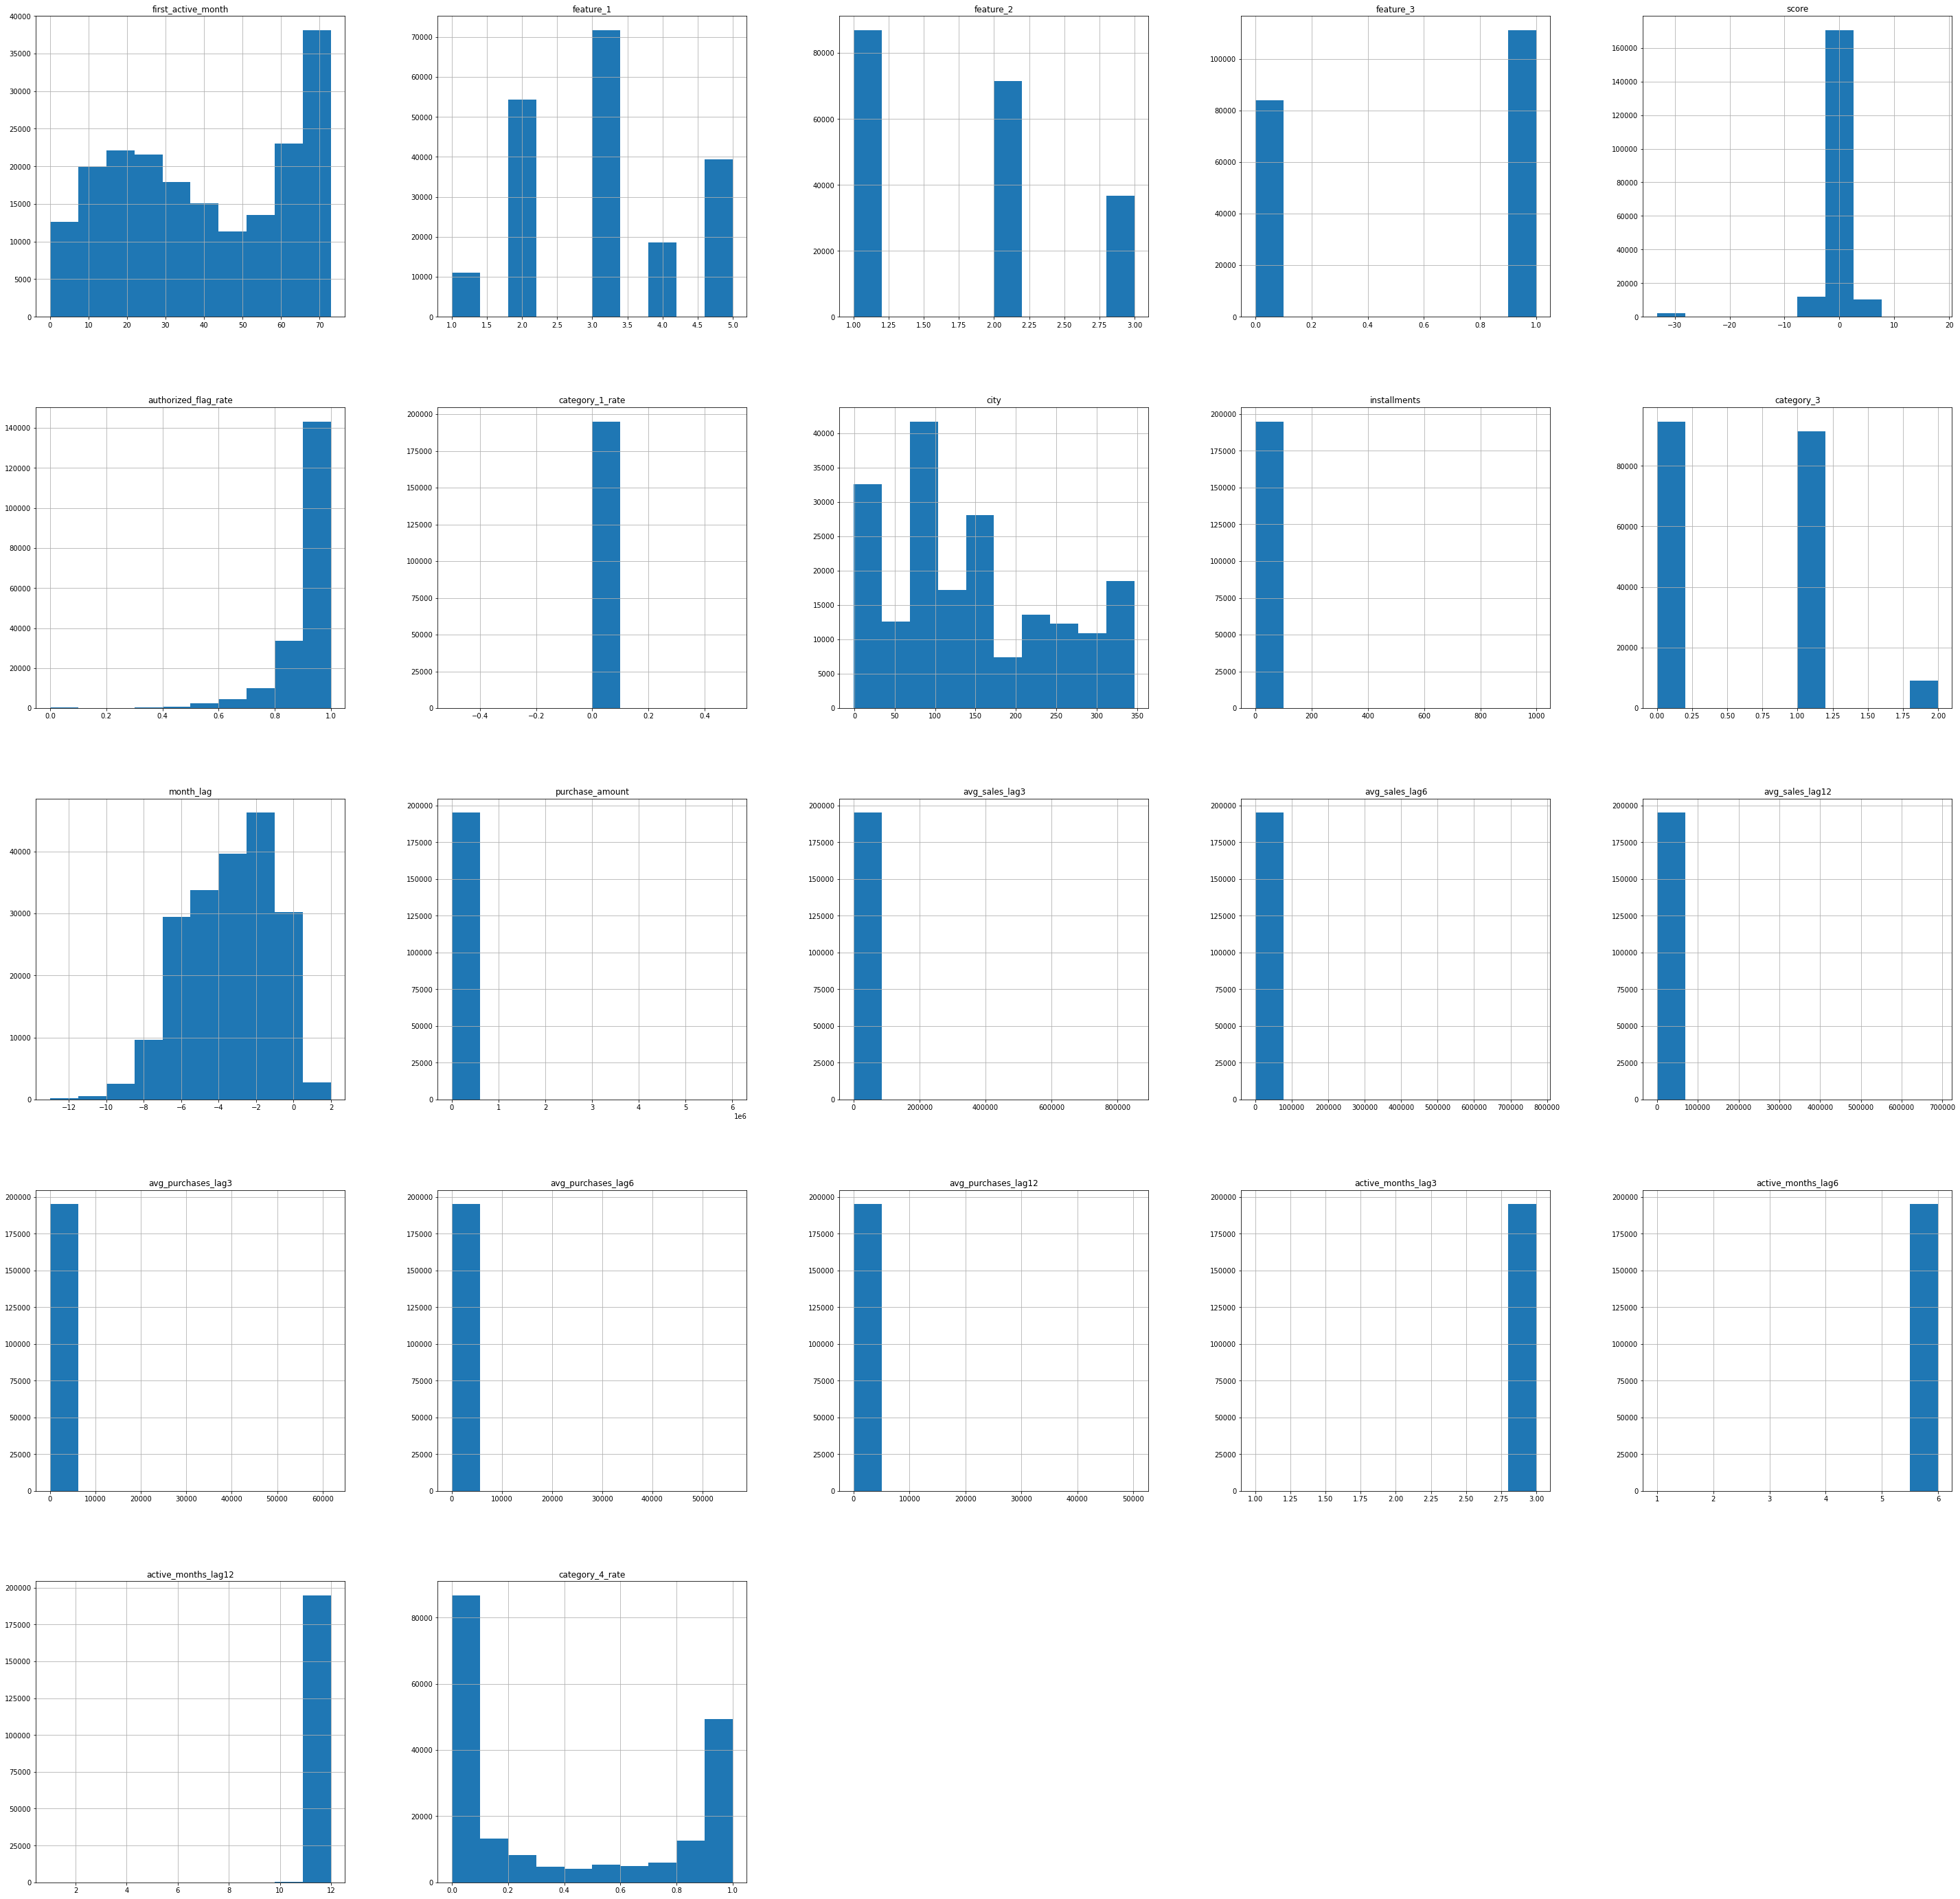

In [42]:
data.hist(figsize=(50,50))

In [43]:
#sns.violinplot(data=data,widths=7)

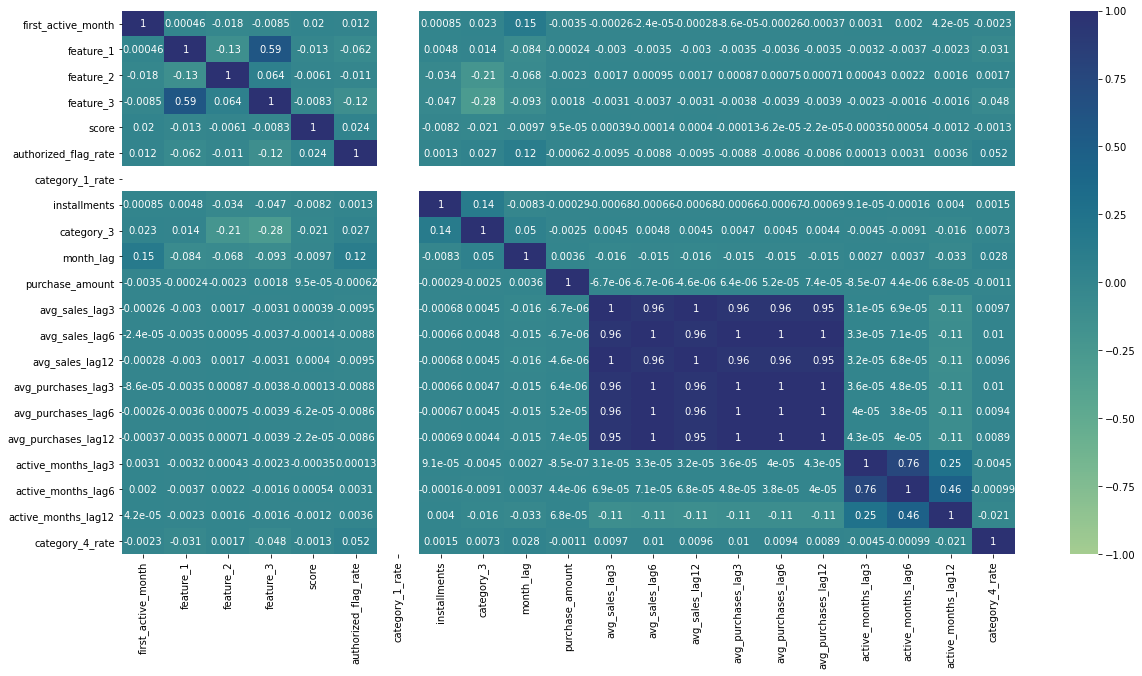

In [63]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='crest', vmin=-1, vmax=1)

# Show the plot
plt.show()

There is a multicollinearity between these columns:
*  'feature_1' & 'feature_3'
* 'avg_sales_lag3', 'avg_sales_lag6','avg_sales_lag12'
* 'avg_purchases_lag3', 'avg_purchases_lag6','avg_purchases_lag12'
* 'active_months_lag3', 'active_months_lag6'

In [44]:
data.drop(['feature_3','avg_sales_lag3', 'avg_sales_lag6','avg_purchases_lag3', 'avg_purchases_lag6', 'active_months_lag6'],axis=1,inplace=True)

#### Check outliers

In [45]:
# Calculate the IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate the range of outliers for each column
range_outliers = upper_bound - lower_bound

# Print the range of outliers for each column
print(range_outliers)

first_active_month      172.000000
feature_1                 8.000000
feature_2                 4.000000
score                     6.585386
authorized_flag_rate      0.440000
category_1_rate           0.000000
city                    588.000000
installments             20.000000
category_3                4.000000
month_lag                14.854220
purchase_amount         179.334025
avg_sales_lag12           0.640000
avg_purchases_lag12       0.621433
active_months_lag3        0.000000
active_months_lag12       0.000000
category_4_rate           3.600000
dtype: float64


In [46]:
# Remove the outliers from the Data
data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

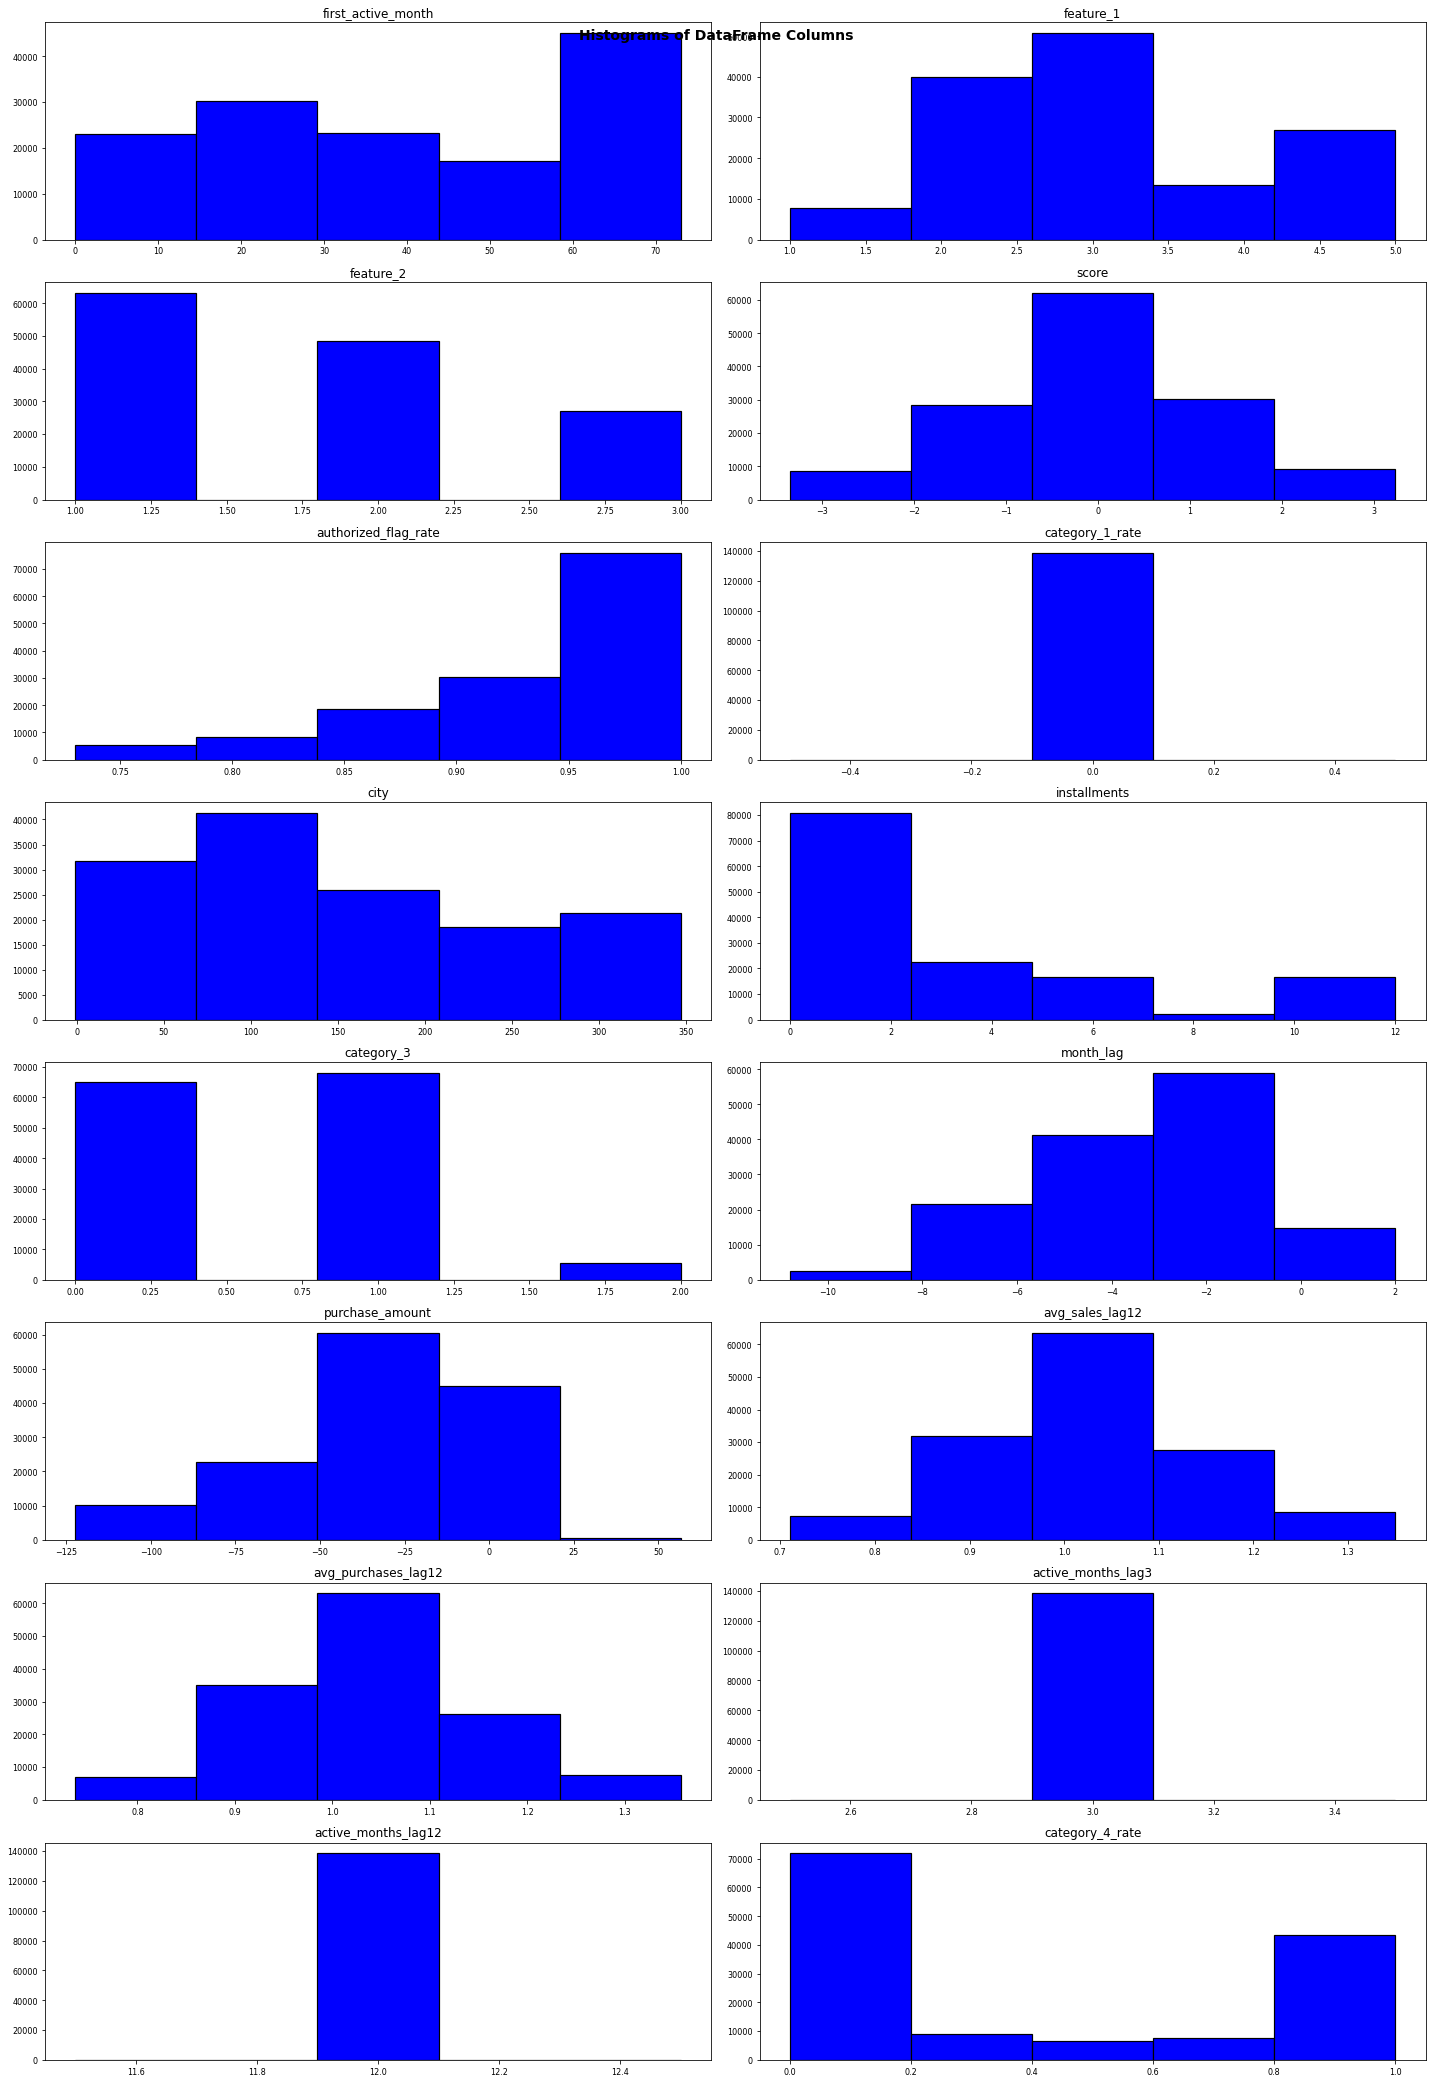

In [47]:
# Plot subplots of histograms for each column
data.hist(figsize=(20, 40), bins=5, color='blue', edgecolor='black', linewidth=1.2, xlabelsize=8, ylabelsize=8, grid=False, layout=(11, 2))

# Set plot titles and axis labels
plt.suptitle('Histograms of DataFrame Columns', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [48]:
data.columns

Index(['first_active_month', 'feature_1', 'feature_2', 'score',
       'authorized_flag_rate', 'category_1_rate', 'city', 'installments',
       'category_3', 'month_lag', 'purchase_amount', 'avg_sales_lag12',
       'avg_purchases_lag12', 'active_months_lag3', 'active_months_lag12',
       'category_4_rate'],
      dtype='object')

In [49]:
score = data['score']

In [50]:
data.drop(['score'],axis=1,inplace=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138774 entries, 2 to 195092
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   first_active_month    138774 non-null  int32  
 1   feature_1             138774 non-null  int64  
 2   feature_2             138774 non-null  int64  
 3   authorized_flag_rate  138774 non-null  float64
 4   category_1_rate       138774 non-null  int32  
 5   city                  138774 non-null  int16  
 6   installments          138774 non-null  int16  
 7   category_3            138774 non-null  int32  
 8   month_lag             138774 non-null  float64
 9   purchase_amount       138774 non-null  float64
 10  avg_sales_lag12       138774 non-null  float64
 11  avg_purchases_lag12   138774 non-null  float64
 12  active_months_lag3    138774 non-null  int8   
 13  active_months_lag12   138774 non-null  int8   
 14  category_4_rate       138774 non-null  float64
dtype

In [52]:
! pip install yellowbrick

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-0.17.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [53]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Perform Robust Scaling
scaled_data = scaler.fit_transform(data)


# Q 1

C:\Users\LAB\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LAB\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LAB\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LAB\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

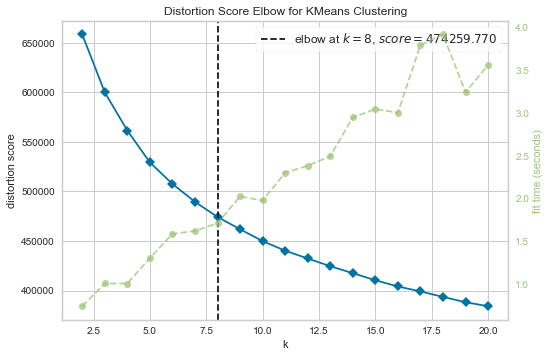

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 21))

visualizer.fit(scaled_data)   
visualizer.show()

Determining the best (K) using the elbow method and the result shows that the best k = 7

In [55]:
# Initialize KMeans clustering
kmeans = KMeans(n_clusters=7)

# Fit the scaled data to KMeans
kmeans.fit(scaled_data)

C:\Users\LAB\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [56]:
print(kmeans.cluster_centers_)

[[ 1.31641760e-02 -5.55167036e-01 -9.32129201e-01  3.49466693e-02
   0.00000000e+00  6.11840075e-02  8.02012477e-01  5.75568525e-02
   9.55671574e-02  2.88282728e-02  1.16544001e-02  2.50700208e-02
   0.00000000e+00  0.00000000e+00  2.60376695e-01]
 [ 1.93338713e-02 -1.64164038e-01  9.68201893e-01 -8.66372240e-02
   0.00000000e+00  5.39041009e-02  9.18296530e-01  8.78233438e-02
  -1.95438514e-02  3.91527052e-03 -6.44299234e-02 -2.41950309e-02
   0.00000000e+00  0.00000000e+00  2.96001134e-01]
 [ 1.59776199e-02  3.76541153e-02 -2.95568144e-01 -4.39453515e-02
   0.00000000e+00  3.72542486e-02  1.56921026e-01 -5.24358547e-01
   1.00182530e-01  1.14387551e-01 -1.18512877e+00 -1.12029885e+00
   0.00000000e+00  0.00000000e+00  2.17573168e-01]
 [-1.27320600e-02  4.36310470e-02 -2.82819474e-01 -2.41296876e-01
   0.00000000e+00 -2.43205253e-02  1.62468578e-01 -5.97445237e-01
  -9.58831802e-02 -2.65397458e-01  1.31499586e+00  1.26865074e+00
   0.00000000e+00  0.00000000e+00  2.79457852e-01]
 [-2

In [57]:
# Predict labels for new data points
labels = kmeans.predict(scaled_data)

<AxesSubplot:title={'center':'Distripution of data for 7 Clusters'}>

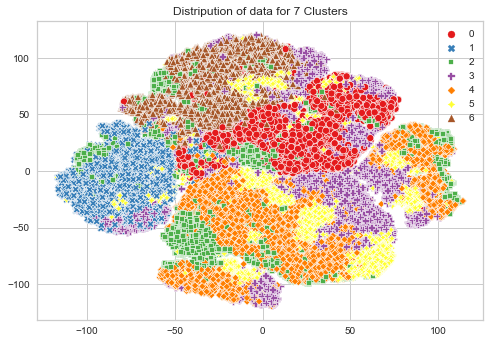

In [58]:
from sklearn.manifold import TSNE
# Initialise TSNE
clusters_number = 7
test = scaled_data.copy()
# test = test.drop(['score', 'cluster'], axis=1)
TSNE_model = TSNE(random_state=1)
Data = TSNE_model.fit_transform(test)

# Plot t-SNE
plt.title('Distripution of data for {} Clusters'.format(clusters_number))
sns.scatterplot(x=Data[:,0], y=Data[:,1], 
                hue=labels, style=labels, palette="Set1")

> ### Q1 Answer
* clusters are very overlapping and it may be because the features used for clustering do not adequately capture the inherent structure of the data may be because the underlying data distribution is complex

* the best k value is 7 using the elbow method , this method  involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow" point, which represents the point of diminishing returns in terms of decreasing WCSS as the number of clusters increases

In [60]:
data['score'] = score
data['labels'] = labels

In [68]:
data[data['labels'] ==0].describe()

,first_active_month,feature_1,feature_2,authorized_flag_rate,category_1_rate,city,installments,category_3,month_lag,purchase_amount,avg_sales_lag12,avg_purchases_lag12,active_months_lag3,active_months_lag12,category_4_rate,score,labels
count,19883.000000,19883.000000,19883.000000,19883.000000,19883.0,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.0,19883.0,19883.000000,19883.000000,19883.0
mean,41.566665,1.889554,1.067897,0.953497,0.0,146.184580,5.010662,1.057637,-2.560211,-23.996389,1.021477,1.033939,3.0,12.0,0.391682,0.004887,0.0
std,22.455061,0.551240,0.251576,0.062763,0.0,100.858047,3.207536,0.241123,1.955971,20.320761,0.078550,0.078423,0.0,0.0,0.417719,1.160172,0.0
min,2.000000,1.000000,1.000000,0.730000,0.0,-1.000000,1.000000,0.000000,-10.750000,-113.589520,0.720000,0.739167,3.0,12.0,0.000000,-3.348041,0.0
25%,18.000000,2.000000,1.000000,0.920000,0.0,69.000000,3.000000,1.000000,-3.777778,-34.934972,0.970000,0.981602,3.0,12.0,0.000000,-0.676921,0.0
50%,42.000000,2.000000,1.000000,0.980000,0.0,137.000000,4.000000,1.000000,-2.260870,-19.172191,1.020000,1.026509,3.0,12.0,0.150000,0.032184,0.0
75%,61.000000,2.000000,1.000000,1.000000,0.0,220.500000,6.000000,1.000000,-1.062500,-8.950872,1.070000,1.084418,3.0,12.0,0.890000,0.700740,0.0
max,73.000000,4.000000,2.000000,1.000000,0.0,347.000000,12.000000,2.000000,2.000000,56.342988,1.350000,1.355903,3.0,12.0,1.000000,3.227401,0.0


# Q2

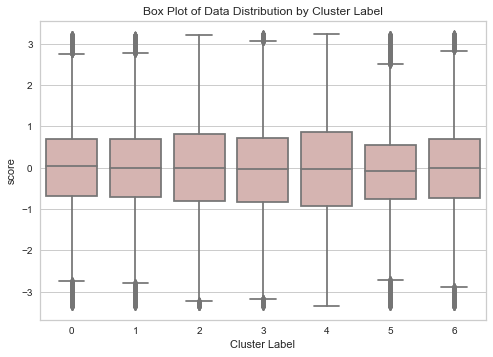

In [62]:
# Plot the box plot
sns.boxplot(x = 'labels', y = 'score',data = data,  color='#DBAfAB')
plt.xlabel('Cluster Label')
plt.ylabel('score')
plt.title('Box Plot of Data Distribution by Cluster Label')
# Show the plot
plt.show()

In [63]:
data.groupby('labels').score.describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,19883.0,0.004887,1.160172,-3.348041,-0.676921,0.032184,0.700740,3.227401
1,15852.0,-0.013916,1.164851,-3.353861,-0.704656,-0.000900,0.686658,3.221936
2,15019.0,0.008964,1.290355,-3.352365,-0.802241,0.005589,0.820275,3.224317
3,19485.0,-0.045331,1.264853,-3.350552,-0.833502,-0.032363,0.725627,3.230151
4,31778.0,-0.034663,1.364294,-3.353366,-0.927552,-0.037063,0.855513,3.230611
5,17659.0,-0.102171,1.130558,-3.350156,-0.758150,-0.083787,0.551943,3.226021
6,19098.0,-0.025762,1.209747,-3.353151,-0.740829,0.000000,0.692671,3.230246


In [64]:
Score_statics = pd.DataFrame() 
Score_statics['mean_score'] = data.groupby('labels')['score'].mean()
Score_statics['median_score'] = data.groupby('labels')['score'].median()
Score_statics['std_score'] = data.groupby('labels')['score'].std()

In [65]:
Score_statics

,mean_score,median_score,std_score
labels,,,
0,0.004887,0.032184,1.160172
1,-0.013916,-0.000900,1.164851
2,0.008964,0.005589,1.290355
3,-0.045331,-0.032363,1.264853
4,-0.034663,-0.037063,1.364294
5,-0.102171,-0.083787,1.130558
6,-0.025762,0.000000,1.209747


### Q2 Answer

> the difference of mean score between clusters is relatively low for example cluster 0,2 but between cluster 0,5 is relatively high 


> From the provided table, we can draw the following observations and insights:

*  The mean loyalty score for each cluster ranges from positive to negative values. Cluster 0 has the highest mean score of 0.004887, while Cluster 5 has the lowest mean score of -0.102171. This indicates that Cluster 0 customers, on average, exhibit a slightly higher loyalty score compared to the other clusters.

*  The median loyalty score represents the midpoint of the scores within each cluster. Similar to the mean score, the median score varies across clusters. Cluster 0 has the highest median score of 0.032184, indicating a relatively higher loyalty score compared to other clusters.

*  The standard deviation measures the dispersion or variability of loyalty scores within each cluster. Higher standard deviation values indicate more significant variability. Cluster 4 has the highest standard deviation of 1.364294, suggesting a wider range of loyalty scores compared to other clusters. Conversely, Cluster 5 has the lowest standard deviation of 1.130558, indicating less variability in loyalty scores.

# Q3

In [69]:
from sklearn.decomposition import PCA


# Initialize PCA
pca = PCA(n_components=2)  # Specify the number of components

# Perform PCA
transformed_data = pca.fit_transform(scaled_data)

# print(transformed_data)


C:\Users\LAB\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LAB\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LAB\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LAB\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

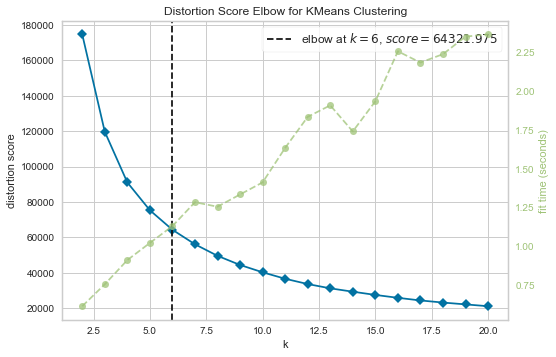

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 21))

visualizer.fit(transformed_data)   
visualizer.show()

In [71]:
# Initialize KMeans clustering
kmeans = KMeans(n_clusters=6)

# Fit the scaled data to KMeans  
kmeans.fit(transformed_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

C:\Users\LAB\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
# Predict labels for new data points
labels = kmeans.predict(transformed_data)

<AxesSubplot:title={'center':'Distripution of data for 6 Clusters'}>

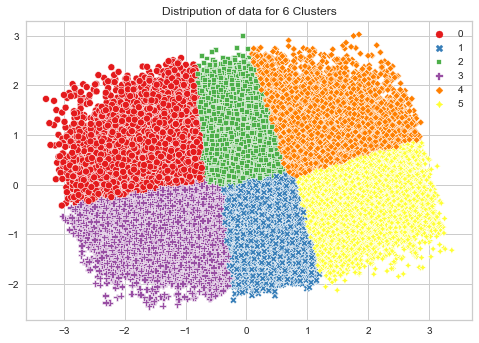

In [92]:
clusters_number = 6

plt.title('Distripution of data for {} Clusters'.format(clusters_number))
sns.scatterplot(x=transformed_data[:,0], y=transformed_data[:,1], 
                hue=labels, style=labels, palette="Set1")

# Q 4

In [105]:
data['score'] = score
data['labels'] = labels

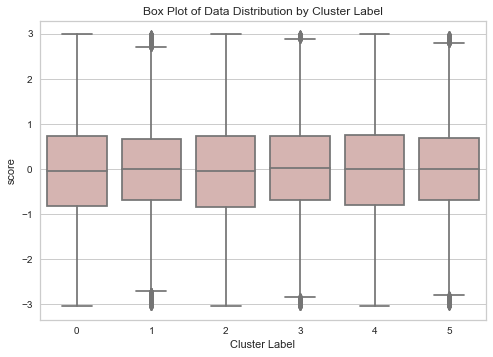

In [106]:
# Plot the box plot
sns.boxplot(x = 'labels', y = 'score',data = data,  color='#DBAfAB')
plt.xlabel('Cluster Label')
plt.ylabel('score')
plt.title('Box Plot of Data Distribution by Cluster Label')
# Show the plot
plt.show()

In [107]:
data.groupby('labels').score.describe()

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,31975.0,-0.045462,1.214526,-3.046437,-0.828800,-0.041192,0.720641,2.980049
1,24044.0,-0.012051,1.115906,-3.045394,-0.685250,0.000000,0.669339,2.979885
2,14471.0,-0.046226,1.226616,-3.046100,-0.836001,-0.048486,0.723125,2.979943
3,14510.0,0.014270,1.159990,-3.045635,-0.701359,0.017946,0.727926,2.979587
4,21715.0,-0.018223,1.220403,-3.045268,-0.810342,-0.012894,0.759073,2.979992
5,11769.0,-0.009110,1.131978,-3.045600,-0.702226,0.000123,0.692069,2.975006


In [108]:
Score_statics = pd.DataFrame() 
Score_statics['mean_score'] = data.groupby('labels')['score'].mean()
Score_statics['median_score'] = data.groupby('labels')['score'].median()
Score_statics['std_score'] = data.groupby('labels')['score'].std()

In [109]:
Score_statics

,mean_score,median_score,std_score
labels,,,
0,-0.045462,-0.041192,1.214526
1,-0.012051,0.000000,1.115906
2,-0.046226,-0.048486,1.226616
3,0.014270,0.017946,1.159990
4,-0.018223,-0.012894,1.220403
5,-0.009110,0.000123,1.131978


###  Q4 Answer

> By comparing the results before and after PCA we can found that:

* After feature reduction, the mean scores have generally shifted towards more negative values in most clusters. For example, in Cluster 0, the mean score changed from 0.004887 to -0.045462, indicating a decrease in the average loyalty level. This suggests that certain features that were removed during feature reduction may have contributed positively to loyalty scores.

* The median scores also exhibit variations between the two tables. Some clusters, such as Cluster 1 and Cluster 5, show a shift towards a median score of 0 after feature reduction. This implies that feature reduction might have eliminated certain features that previously had a greater influence on the loyalty scores.

* The standard deviation values show fluctuations in both tables, indicating changes in the variability of loyalty scores. Some clusters, like Cluster 2 and Cluster 4, experience an increase in standard deviation after feature reduction, suggesting greater variability in loyalty scores within these clusters.

### Q5

In [74]:
del(df_merchants,df_new_merchant_transactions,df_historical_transactions)

In [75]:
pattern_data = df_merchant_transactions.copy()

pattern_data_merged= df_userscore.merge(pattern_data, on=['card_id'], how='inner')

In [78]:
pattern_data_merged

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,card_id,first_active_month,feature_1,feature_2,feature_3,score,authorized_flag,city_id_x,category_1,installments,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,state_id,city_id,authorized_flag_0_1,category_1_0_1,category_4_0_1
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,Y,19,N,0,...,6,1.29,1.261291,12,N,9,19,1,0,0
1,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,Y,69,N,0,...,6,1.13,1.125829,12,Y,9,69,1,0,1
2,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,Y,69,N,0,...,6,1.13,1.125829,12,Y,9,69,1,0,1
3,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,Y,69,N,0,...,6,0.95,0.933410,12,Y,9,69,1,0,1
4,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,Y,69,N,0,...,6,0.95,0.933410,12,Y,9,69,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14213560,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,1,...,6,1.08,1.101411,12,Y,7,25,1,0,1
14213561,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,3,...,6,1.05,0.990239,12,Y,7,25,1,0,1
14213562,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,2,...,6,0.97,1.066735,12,Y,7,25,1,0,1
14213563,C_ID_92c9984c58,Jul-17,3,1,1,-1.859413,Y,25,N,1,...,6,1.03,1.375000,12,Y,7,25,1,0,1


In [81]:
pattern_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14213565 entries, 0 to 14213564
Data columns (total 39 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   card_id                      object 
 1   first_active_month           object 
 2   feature_1                    int64  
 3   feature_2                    int64  
 4   feature_3                    int64  
 5   score                        float64
 6   authorized_flag              object 
 7   city_id_x                    int16  
 8   category_1                   object 
 9   installments                 int16  
 10  category_3                   object 
 11  merchant_category_id         int16  
 12  merchant_id                  object 
 13  month_lag                    int8   
 14  purchase_amount              float64
 15  purchase_date                object 
 16  category_2                   float64
 17  state_id_x                   int8   
 18  subsector_id                 int8   
 19

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [85]:
pattern_data_merged['merchant_category_id'].nunique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


315

In [98]:

transactions = pattern_data_merged.groupby('card_id')['merchant_category_id'].apply(list)
# col = pattern_data_merged['merchant_category_id'].astype(str).tolist()

# Encode the transactions into a binary matrix
te = TransactionEncoder()
te_ary = te.fit_transform(transactions.tolist())
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(195093, 315)

In [101]:
# Apply the Apriori algorithm to find frequent itemsets with min_support=0.5
frequent_itemsets = apriori(df_encoded, min_support=0.5, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
frequent_itemsets

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.653273,(80)
1,0.654324,(278)
2,0.718544,(307)
3,0.748351,(367)
4,0.890914,(705)
5,0.535770,"(80, 278)"
6,0.519588,"(80, 307)"
7,0.551035,"(80, 367)"
8,0.621862,"(80, 705)"
9,0.529055,"(307, 278)"


In [102]:
rules

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(80),(278),0.653273,0.654324,0.535770,0.820132,1.253404,0.108318,1.921832
1,(278),(80),0.654324,0.653273,0.535770,0.818815,1.253404,0.108318,1.913662
2,(80),(307),0.653273,0.718544,0.519588,0.795361,1.106906,0.050182,1.375378
3,(307),(80),0.718544,0.653273,0.519588,0.723112,1.106906,0.050182,1.252228
4,(80),(367),0.653273,0.748351,0.551035,0.843498,1.127143,0.062157,1.607964
5,(367),(80),0.748351,0.653273,0.551035,0.736332,1.127143,0.062157,1.315013
6,(80),(705),0.653273,0.890914,0.621862,0.951918,1.068474,0.039853,2.268759
7,(307),(278),0.718544,0.654324,0.529055,0.736288,1.125265,0.058895,1.310807
8,(278),(307),0.654324,0.718544,0.529055,0.808553,1.125265,0.058895,1.470147
9,(278),(367),0.654324,0.748351,0.548092,0.837647,1.119324,0.058429,1.550013


In [105]:
# Apply the Apriori algorithm to find frequent itemsets with min_support=0.7
frequent_itemsets_2 = apriori(df_encoded, min_support=0.7, use_colnames=True)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
frequent_itemsets_2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.718544,(307)
1,0.748351,(367)
2,0.890914,(705)
3,0.710548,"(705, 367)"


In [107]:
# Apply the Apriori algorithm to find frequent itemsets with min_support=0.3
frequent_itemsets_3 = apriori(df_encoded, min_support=0.3, use_colnames=True)
frequent_itemsets_3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.357481,(68)
1,0.653273,(80)
2,0.654324,(278)
3,0.718544,(307)
4,0.748351,(367)
...,...,...
128,0.322482,"(705, 683, 367, 80, 278)"
129,0.319104,"(705, 367, 560, 80, 307)"
130,0.305183,"(705, 683, 367, 80, 307)"
131,0.315952,"(705, 367, 560, 307, 278)"


> after 3 trial with different 3 min_support values (0.5,0.7,0.3), I found that the selection of the min_support threshold should be based on a trade-off between the desired level of pattern significance and the diversity of the patterns.

# Q6

In [108]:
# Define the score threshold for splitting
threshold = pattern_data_merged.score.mean()

# Split the DataFrame based on the score value
above_threshold = pattern_data_merged[pattern_data_merged['score'] >= threshold]
below_threshold = pattern_data_merged[pattern_data_merged['score'] < threshold]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:

high_loyalty = above_threshold.groupby('card_id')['merchant_category_id'].apply(list)

# Encode the transactions into a binary matrix
te = TransactionEncoder()
te_ary = te.fit_transform(high_loyalty.tolist())
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.shape


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(123241, 313)

In [110]:
# Apply the Apriori algorithm to find frequent itemsets with min_support=0.5
frequent_itemsets_h = apriori(df_encoded, min_support=0.5, use_colnames=True)

# Generate association rules
rules_h = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
frequent_itemsets_h

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.646863,(80)
1,0.646952,(278)
2,0.713407,(307)
3,0.743892,(367)
4,0.888519,(705)
5,0.528144,"(80, 278)"
6,0.511648,"(80, 307)"
7,0.543293,"(80, 367)"
8,0.614162,"(80, 705)"
9,0.520736,"(307, 278)"


In [112]:
rules_h

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(80),(278),0.653273,0.654324,0.535770,0.820132,1.253404,0.108318,1.921832
1,(278),(80),0.654324,0.653273,0.535770,0.818815,1.253404,0.108318,1.913662
2,(80),(307),0.653273,0.718544,0.519588,0.795361,1.106906,0.050182,1.375378
3,(307),(80),0.718544,0.653273,0.519588,0.723112,1.106906,0.050182,1.252228
4,(80),(367),0.653273,0.748351,0.551035,0.843498,1.127143,0.062157,1.607964
5,(367),(80),0.748351,0.653273,0.551035,0.736332,1.127143,0.062157,1.315013
6,(80),(705),0.653273,0.890914,0.621862,0.951918,1.068474,0.039853,2.268759
7,(307),(278),0.718544,0.654324,0.529055,0.736288,1.125265,0.058895,1.310807
8,(278),(307),0.654324,0.718544,0.529055,0.808553,1.125265,0.058895,1.470147
9,(278),(367),0.654324,0.748351,0.548092,0.837647,1.119324,0.058429,1.550013


In [113]:

low_loyalty = below_threshold.groupby('card_id')['merchant_category_id'].apply(list)

# Encode the transactions into a binary matrix
te = TransactionEncoder()
te_ary = te.fit_transform(low_loyalty.tolist())
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.shape


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(71852, 305)

In [114]:
# Apply the Apriori algorithm to find frequent itemsets with min_support=0.5
frequent_itemsets_l = apriori(df_encoded, min_support=0.5, use_colnames=True)

# Generate association rules
rules_l = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
frequent_itemsets_l

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.664268,(80)
1,0.666968,(278)
2,0.727356,(307)
3,0.755998,(367)
4,0.508740,(560)
5,0.895020,(705)
6,0.548850,"(80, 278)"
7,0.533207,"(80, 307)"
8,0.564313,"(80, 367)"
9,0.635069,"(80, 705)"


In [116]:
rules_l

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(80),(278),0.653273,0.654324,0.535770,0.820132,1.253404,0.108318,1.921832
1,(278),(80),0.654324,0.653273,0.535770,0.818815,1.253404,0.108318,1.913662
2,(80),(307),0.653273,0.718544,0.519588,0.795361,1.106906,0.050182,1.375378
3,(307),(80),0.718544,0.653273,0.519588,0.723112,1.106906,0.050182,1.252228
4,(80),(367),0.653273,0.748351,0.551035,0.843498,1.127143,0.062157,1.607964
5,(367),(80),0.748351,0.653273,0.551035,0.736332,1.127143,0.062157,1.315013
6,(80),(705),0.653273,0.890914,0.621862,0.951918,1.068474,0.039853,2.268759
7,(307),(278),0.718544,0.654324,0.529055,0.736288,1.125265,0.058895,1.310807
8,(278),(307),0.654324,0.718544,0.529055,0.808553,1.125265,0.058895,1.470147
9,(278),(367),0.654324,0.748351,0.548092,0.837647,1.119324,0.058429,1.550013


### Q6 Answer

Based on the results of frequent itemsets and association rules for high and low loyalty scores, we can observe the following:

> For High Loyalty Scores:

* The frequent itemsets indicate the items that are commonly associated with users who have high loyalty scores. The support values represent the proportion of transactions that contain these itemsets.
* The most frequent items for high loyalty scores are (80), (278), (307), (367), and (705), with support values ranging from 0.646 to 0.888.
* The association rules provide insights into the relationships between different items. For example, the rule (80) -> (278) suggests that customers who purchase item 80 are highly likely to also purchase item 278, with a confidence of 0.820.
* These patterns and associations can be used to understand the preferences and behaviors of users with high loyalty scores, which can inform targeted marketing strategies and personalized recommendations.

> For Low Loyalty Scores:

* The frequent itemsets for low loyalty scores also reveal the items that are frequently associated with users who have low loyalty scores. The support values indicate the proportion of transactions that contain these itemsets.
* The most frequent items for low loyalty scores are (80), (278), (307), (367), and (705), similar to the high loyalty scores, but with slightly different support values.
* The association rules for low loyalty scores show the relationships between items and can help identify potential cross-selling opportunities or patterns. These rules provide insights into the preferences and behaviors of users with low loyalty scores.
> ### By comparing the frequent itemsets and association rules between high and low loyalty scores, we can identify similarities and differences in purchasing patterns and associations, which can guide targeted marketing efforts to improve customer loyalty and engagement.